In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pertpy as pt

Installed version 0.4.0 of pertpy is newer than the latest release 0.3.0! You are running a 
nightly version and features may break!

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()
2023-02-01 17:41:12.874214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 17:41:12.958844: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-01 17:41:12.958866: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up 

In [2]:
# from sccoda.util import comp_ana as mod
# from sccoda.util import cell_composition_data as dat
# from sccoda.util import data_visualization as viz

2023-01-23 14:35:35.451512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 14:35:35.536530: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-23 14:35:35.536549: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-23 14:35:35.997260: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.10.0 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.3 pynndescent==0.5.7


In [4]:
# adata = sc.read('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/211015_annot_patient_integrated.h5ad')
adata = sc.read('2301_annot_patient_integrated_ambient_removed.h5ad')

In [5]:
# percentage of cells without barcode
adata[adata.obs.treatment == 'nan'].shape[0]/adata.shape[0]

0.19782388865092576

In [6]:
pd.crosstab(adata.obs.treatment, adata.obs.patient)

patient,patient_1,patient_2,patient_3,patient_4
treatment,,,,
BB94,0,0,0,2625
DMSO,0,0,0,1541
Gilteritinib,0,0,0,2590
IFNL,0,0,3957,3462
IFNa (b_d),3627,5706,3458,3360
IFNa_TNFa,3712,0,5500,2914
IFNg,3471,4131,4874,3404
IFNg_TGFb2,0,0,3755,3160
Sorafenib,3413,0,3943,4417


In [10]:
adata = adata[adata.obs.treatment != 'nan']

In [19]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier='cell_type',
    sample_identifier=['identifier', 'patient', 'treatment', 'infected'],
    covariate_obs=['patient', 'treatment', 'infected']
)
print(sccoda_data)
print(sccoda_data["coda"].X)

MuData object with n_obs × n_vars = 182040 × 18128
  2 modalities
    rna:	181660 x 18115
      obs:	'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_batch', '_scvi_labels', 'leiden_coarse', 'leiden_fine', 'leiden_subset', 'celltype_fine', 'celltype_approx', 'ambient', 'scCODA_sample_id'
      var:	'used_for_scvi'
      uns:	'_scvi', 'cell_type_colors', 'celltype_approx_colors', 'celltype_coarse_colors', 'celltype_fine_colors', 'dendrogram_leiden_fine', 'hvg', 'infected_colors', 'leiden', 'leiden_coarse_colors', 'leiden_colors', 'leiden_fine_colors', 'neighbors', 'patient_colors', 'rank_genes_groups', 'treatment_colors', 'umap'
      obsm:	'X_pca', 'X_scVI', 'X_umap'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    coda:	380 x 13
      obs:	'patient', '

In [31]:
sccoda_data["coda"].obs.treatment

,treatment,treatment
scCODA_sample_id,,
muc21058-patient_1-IFNa (b_d)-False,IFNa (b_d),IFNa (b_d)
muc21058-patient_1-IFNa (b_d)-True,IFNa (b_d),IFNa (b_d)
muc21058-patient_1-IFNa_TNFa-False,IFNa_TNFa,IFNa_TNFa
muc21058-patient_1-IFNa_TNFa-True,IFNa_TNFa,IFNa_TNFa
muc21058-patient_1-IFNg-False,IFNg,IFNg
...,...,...
muc22968-patient_4-TNFa_Tirapazamine-True,TNFa_Tirapazamine,TNFa_Tirapazamine
muc22968-patient_4-Tirapazamine-False,Tirapazamine,Tirapazamine
muc22968-patient_4-Tirapazamine-True,Tirapazamine,Tirapazamine


In [28]:
sccoda_data.mod["coda_mock"] = sccoda_data['coda'][sccoda_data["coda"].obs["treatment"] == 'mock'].copy()

IndexError: Unknown indexer                                            treatment  treatment
scCODA_sample_id                                               
muc21058-patient_1-IFNa (b_d)-False            False      False
muc21058-patient_1-IFNa (b_d)-True             False      False
muc21058-patient_1-IFNa_TNFa-False             False      False
muc21058-patient_1-IFNa_TNFa-True              False      False
muc21058-patient_1-IFNg-False                  False      False
...                                              ...        ...
muc22968-patient_4-TNFa_Tirapazamine-True      False      False
muc22968-patient_4-Tirapazamine-False          False      False
muc22968-patient_4-Tirapazamine-True           False      False
muc22968-patient_4-mock-False                   True       True
muc22968-patient_4-mock-True                    True       True

[380 rows x 2 columns] of type <class 'pandas.core.frame.DataFrame'>

Without any correction.

In [8]:
dfs = []
for patient in adata.obs.patient.unique():
    df = pd.crosstab(adata.obs.treatment, adata.obs.cell_type)
    df /= df.sum(0)  # get percentage within cell type
#     df -= df.T['mock']
    df = pd.DataFrame(df.stack()).reset_index()
    df.columns = ['treatment', 'cell_type', 'percentage change']
    df['patient'] = patient
    dfs.append(df)

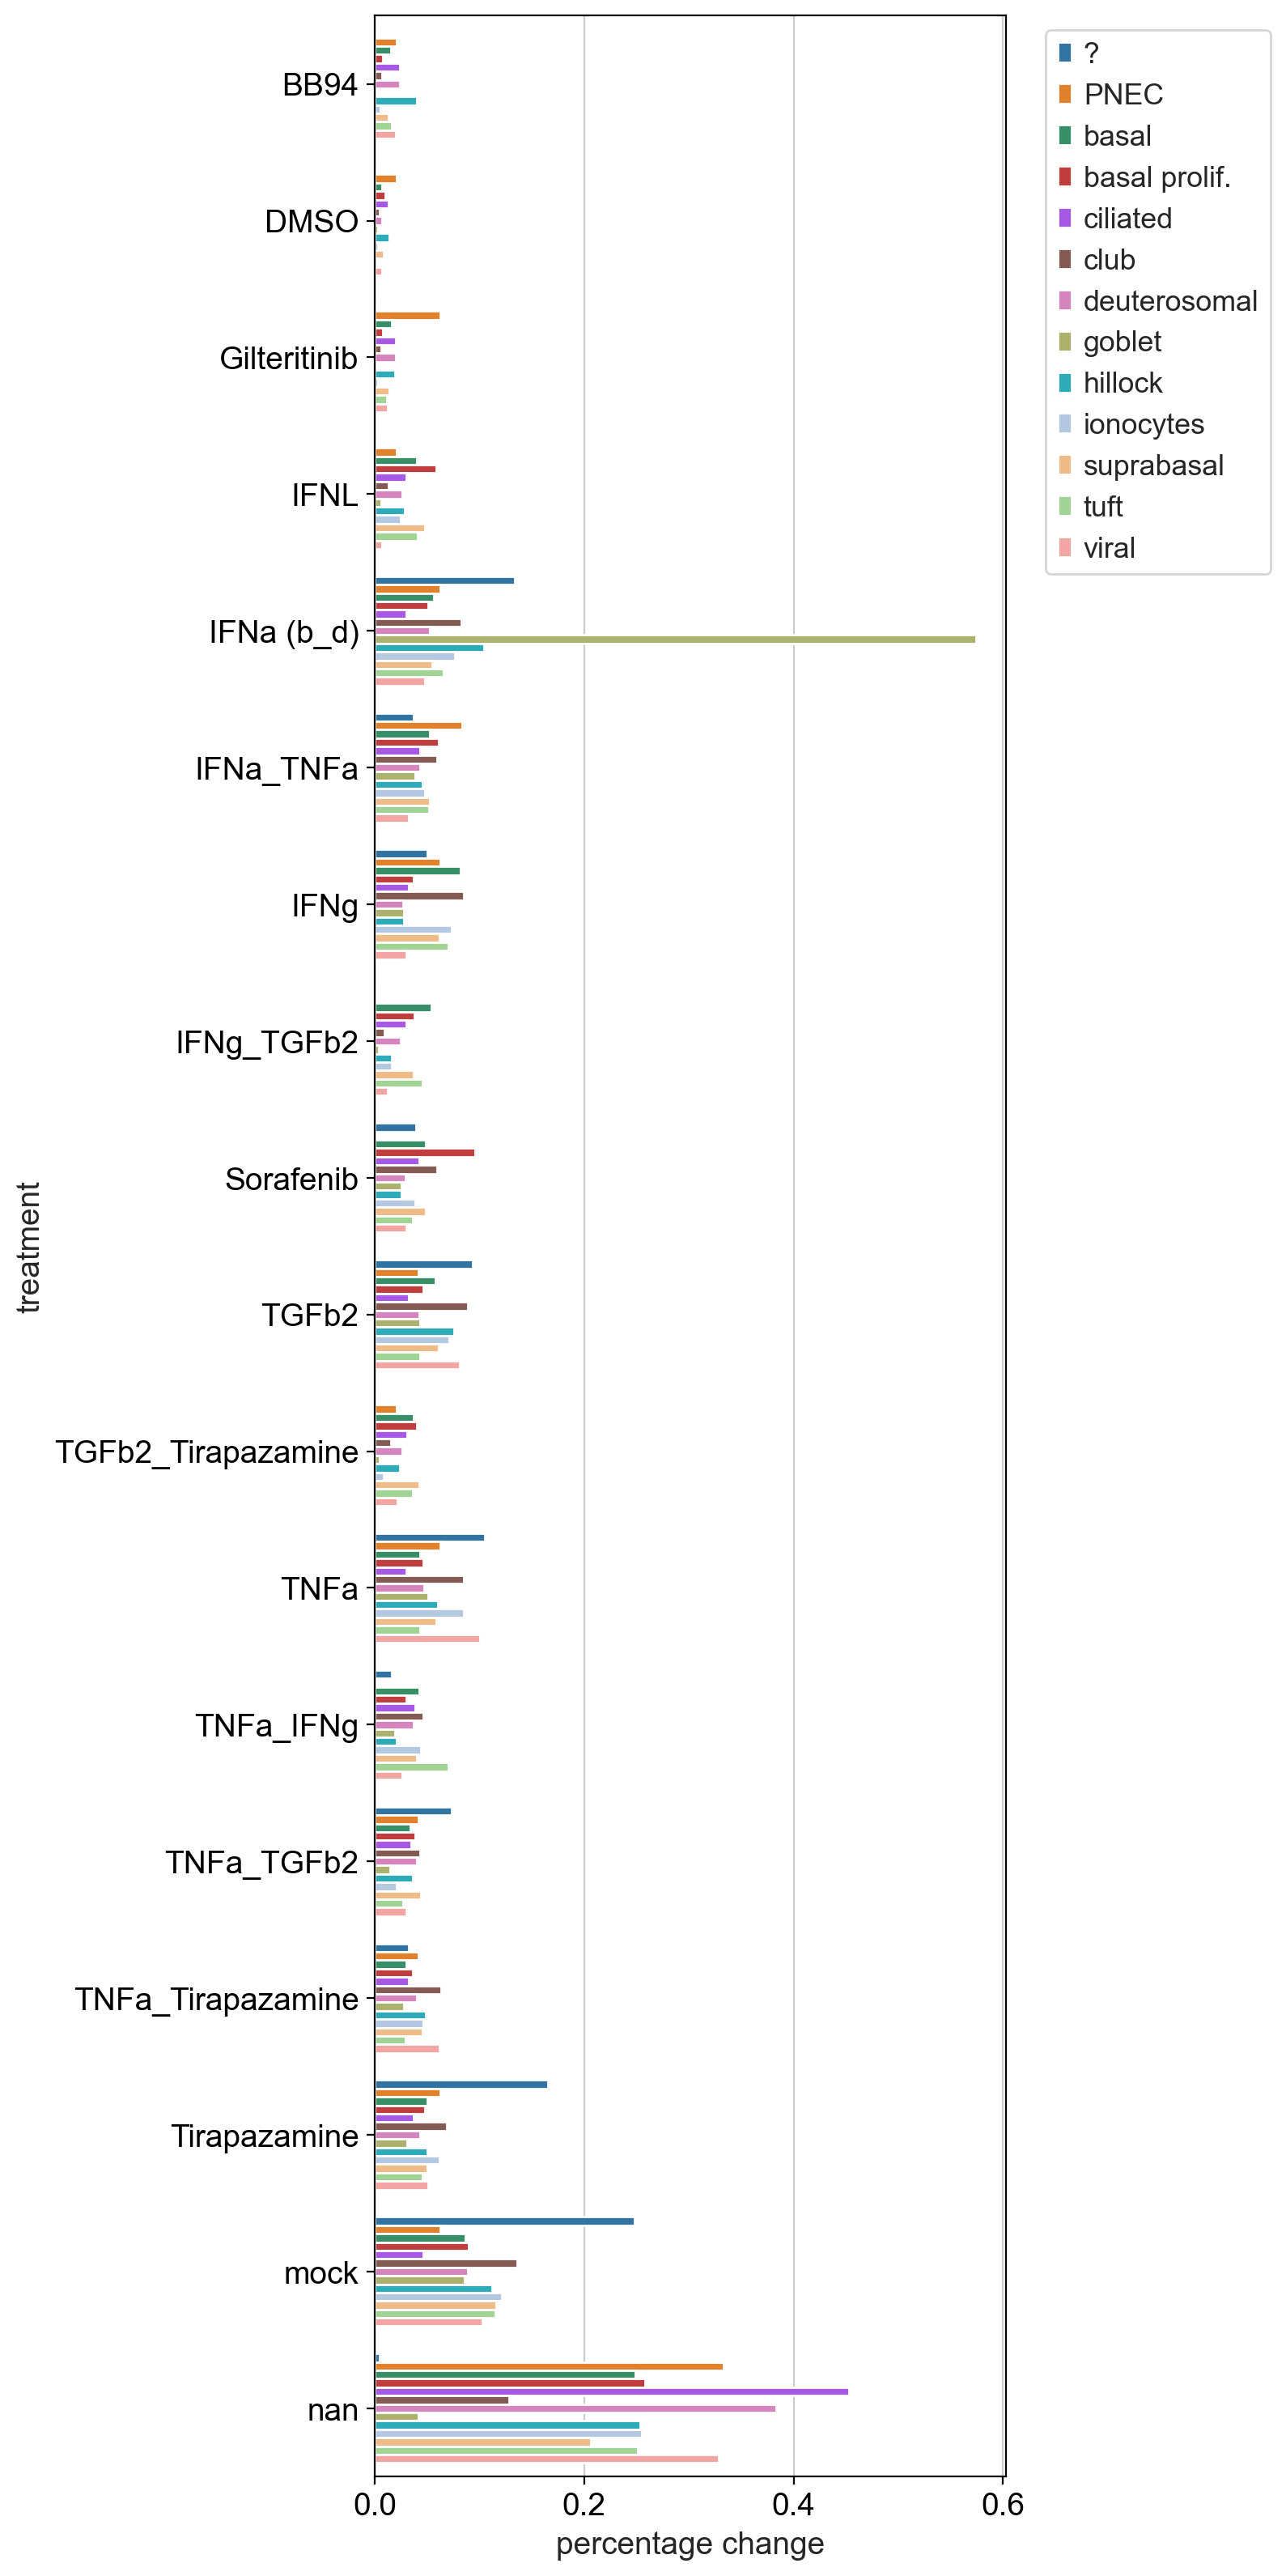

In [9]:
plt.figure(figsize = (5, 20))
sns.barplot(
    data=pd.concat(dfs),
    y='treatment',
    x='percentage change',
    hue='cell_type'
)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

## scCODA

In [27]:
# adata = adata[adata.obs.treatment != 'nan']

In [29]:
# sccoda_model = pt.tl.Sccoda()
# sccoda_data = sccoda_model.load(adata, type="cell_level", generate_sample_level=True, cell_type_identifier="cell_type", sample_identifier="patient", covariate_obs=["infected"])
# sccoda_data

Covariate infected has non-unique values! Skipping...

MuData object with n_obs × n_vars = 181664 × 18128
  2 modalities
    rna:	181660 x 18115
      obs:	'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_batch', '_scvi_labels', 'leiden_coarse', 'leiden_fine', 'leiden_subset', 'celltype_fine', 'celltype_approx', 'ambient'
      var:	'used_for_scvi'
      uns:	'_scvi', 'cell_type_colors', 'celltype_approx_colors', 'celltype_coarse_colors', 'celltype_fine_colors', 'dendrogram_leiden_fine', 'hvg', 'infected_colors', 'leiden', 'leiden_coarse_colors', 'leiden_colors', 'leiden_fine_colors', 'neighbors', 'patient_colors', 'rank_genes_groups', 'treatment_colors', 'umap'
      obsm:	'X_pca', 'X_scVI', 'X_umap'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    coda:	4 x 13
      var:	'n_cells'

In [26]:
# print(sccoda_data["coda"].X)
# print(sccoda_data["coda"].obs)

[[2.3550e+03 2.0000e+00 3.4770e+03 6.5000e+01 7.1000e+01 2.9604e+04
  6.0000e+01 5.2700e+02 5.3800e+02 2.3100e+02 3.9770e+03 3.0000e+01
  2.4500e+02]
 [4.8250e+03 1.0000e+00 2.5130e+03 3.4000e+01 6.2000e+01 1.3210e+04
  7.0000e+01 1.7630e+03 2.4200e+02 9.0000e+01 1.6750e+03 1.3000e+01
  8.5000e+01]
 [3.2000e+01 2.7000e+01 2.9766e+04 3.8910e+03 9.0200e+02 1.1221e+04
  6.4100e+02 1.3900e+02 3.4700e+02 2.8500e+02 4.2958e+04 2.2200e+02
  3.3400e+02]
 [3.6000e+01 1.8000e+01 1.7896e+04 3.0580e+03 7.4310e+03 1.3642e+04
  8.4000e+02 1.7400e+02 1.7200e+03 1.2700e+02 2.4634e+04 1.7700e+02
  1.7600e+02]]
Empty DataFrame
Columns: []
Index: [patient_1, patient_2, patient_3, patient_4]


Infected vs. not:

In [10]:
# sccoda_data.mod["coda_inf"] = sccoda_data["coda"][sccoda_data["coda"].obs["treatment"].isin(["mock"])].copy()

In [11]:
adata = adata[adata.obs.treatment != 'nan']

In [55]:
# construct counts anndata
df = pd.crosstab([adata.obs.treatment, adata.obs.patient, adata.obs.infected], adata.obs.cell_type).reset_index()
df['treatment_patient_infected'] = df['treatment'].astype(str) + '-' + df['patient'].astype(str) + '-' + df['infected'].astype(str)
data_all = dat.from_pandas(
    df.drop(['treatment', 'patient', 'infected'], axis=1),
    covariate_columns=["treatment_patient_infected"]
)

# split out variables
data_all.obs['treatment'] = [x.split('-')[0] for x in data_all.obs['treatment_patient_infected']]
data_all.obs['patient'] = [x.split('-')[1] for x in data_all.obs['treatment_patient_infected']]
data_all.obs['infected'] = [x.split('-')[2] for x in data_all.obs['treatment_patient_infected']]

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/sccoda/util/cell_composition_data.py:294: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return ad.AnnData(X=count_data.values,


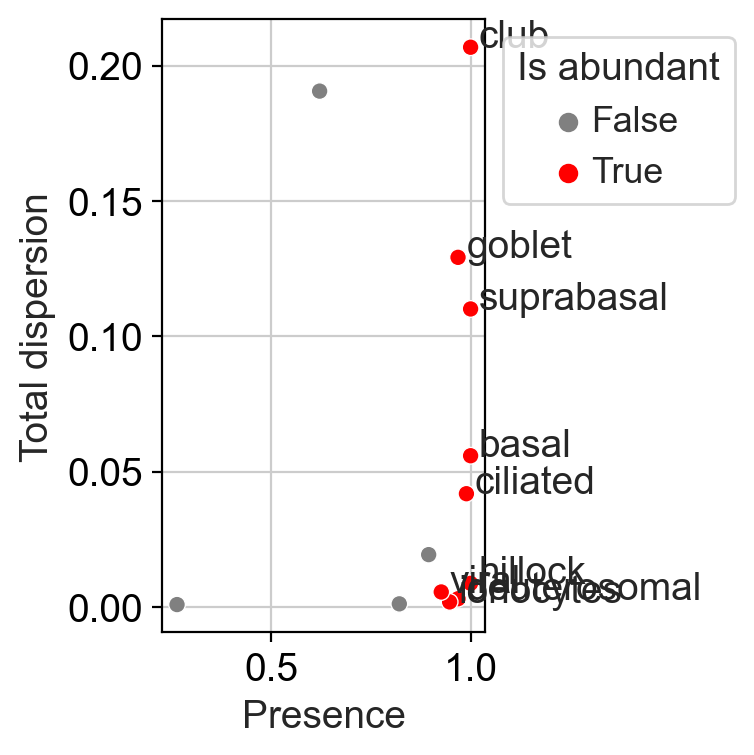

In [57]:
# visualize to find a reference cell type
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9,
    figsize=(4, 4)
)
plt.show()

### infection based models

<AxesSubplot: xlabel='Cell type', ylabel='log(count)'>

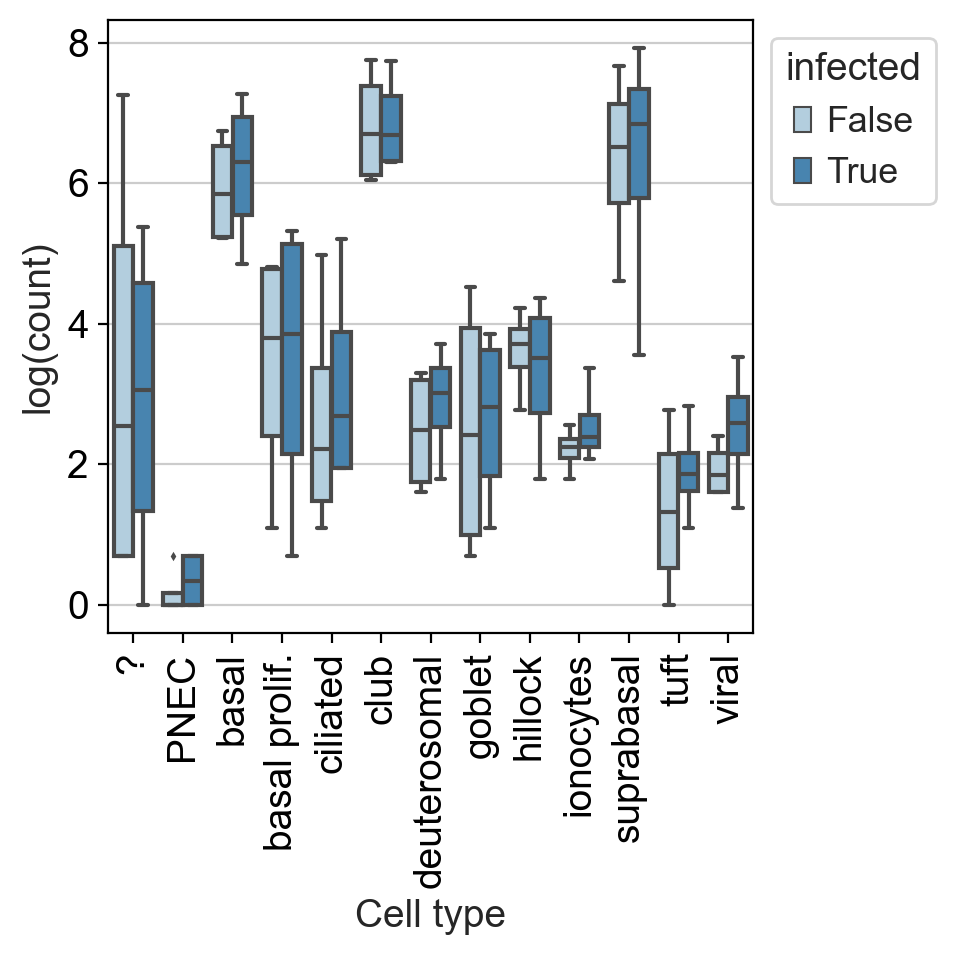

In [112]:
viz.boxplots(data_all[data_all.obs.treatment == 'mock'], feature_name="infected", figsize=(5, 5), y_scale='log')

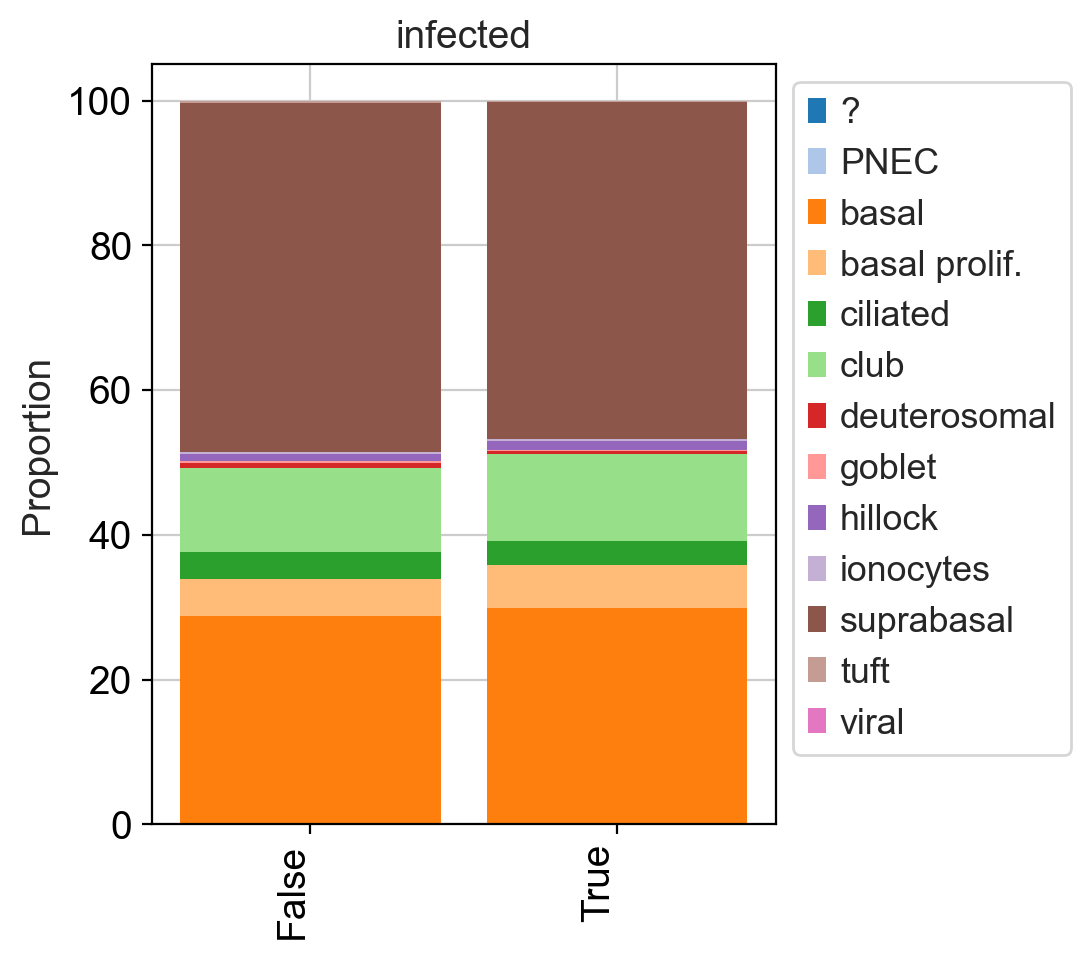

In [101]:
# g = viz.stacked_barplot(data_all, feature_name="infected", figsize=(4, 5))  # also too small
# g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')
# plt.show()

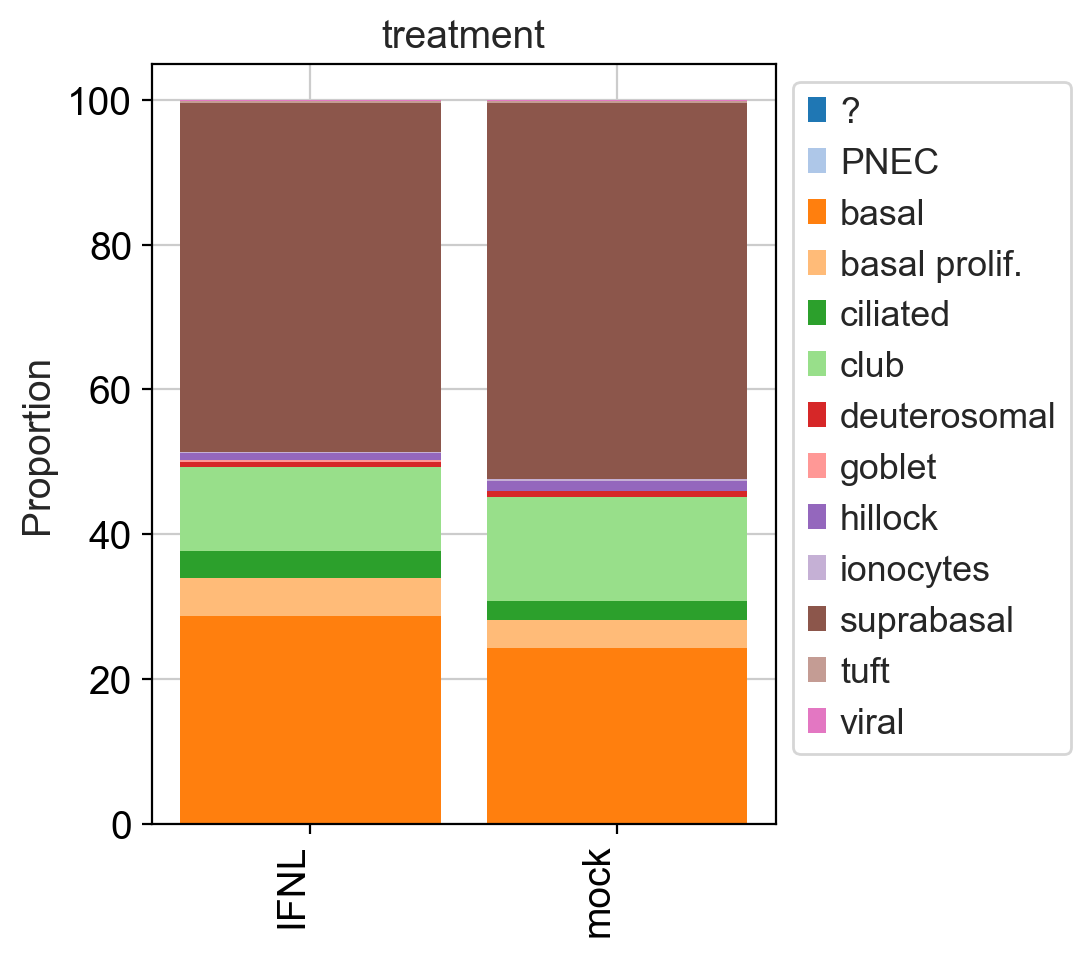

In [124]:
ifnl_subset = data_all[(data_all.obs.infected == 'False') & (data_all.obs.treatment.isin(['mock', 'IFNL'])) & (data_all.obs.patient.isin(['patient_3', 'patient_4']))]
g = viz.stacked_barplot(ifnl_subset, feature_name="treatment", figsize=(4, 5))  # also too small
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')
plt.show()

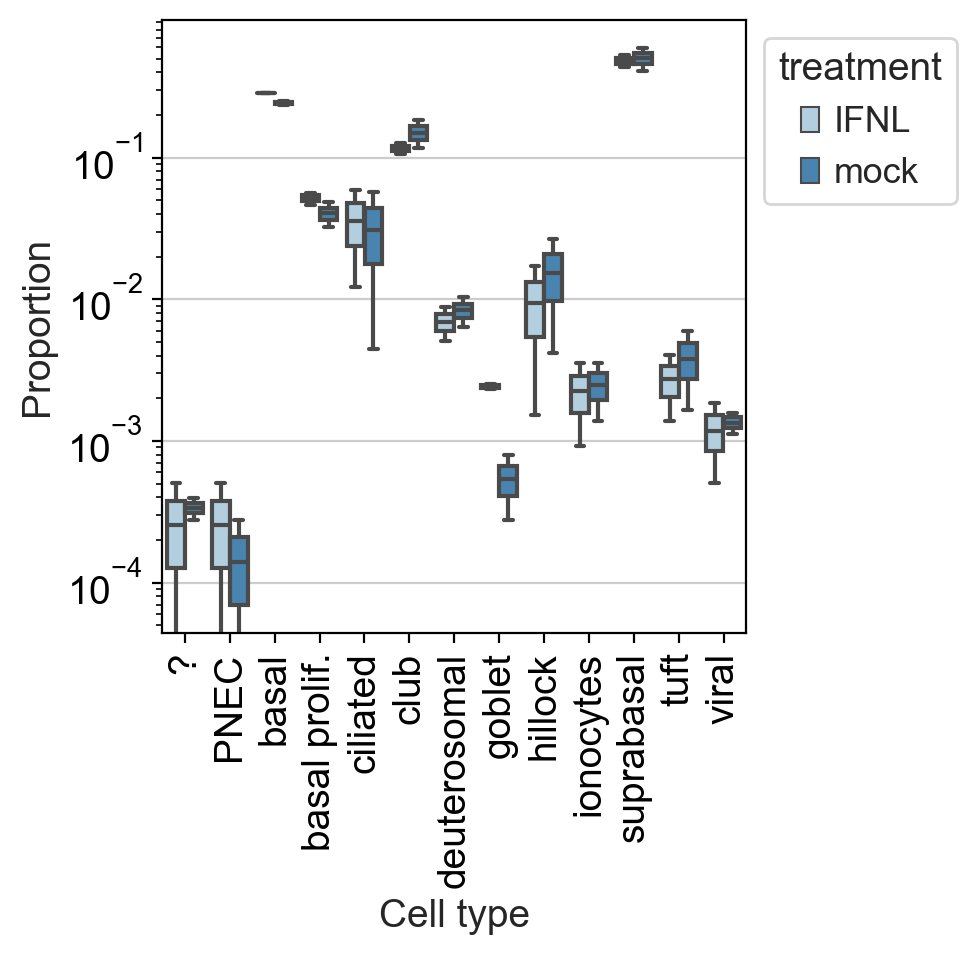

In [125]:
viz.boxplots(ifnl_subset, feature_name="treatment", figsize=(5, 5))
plt.yscale('log')

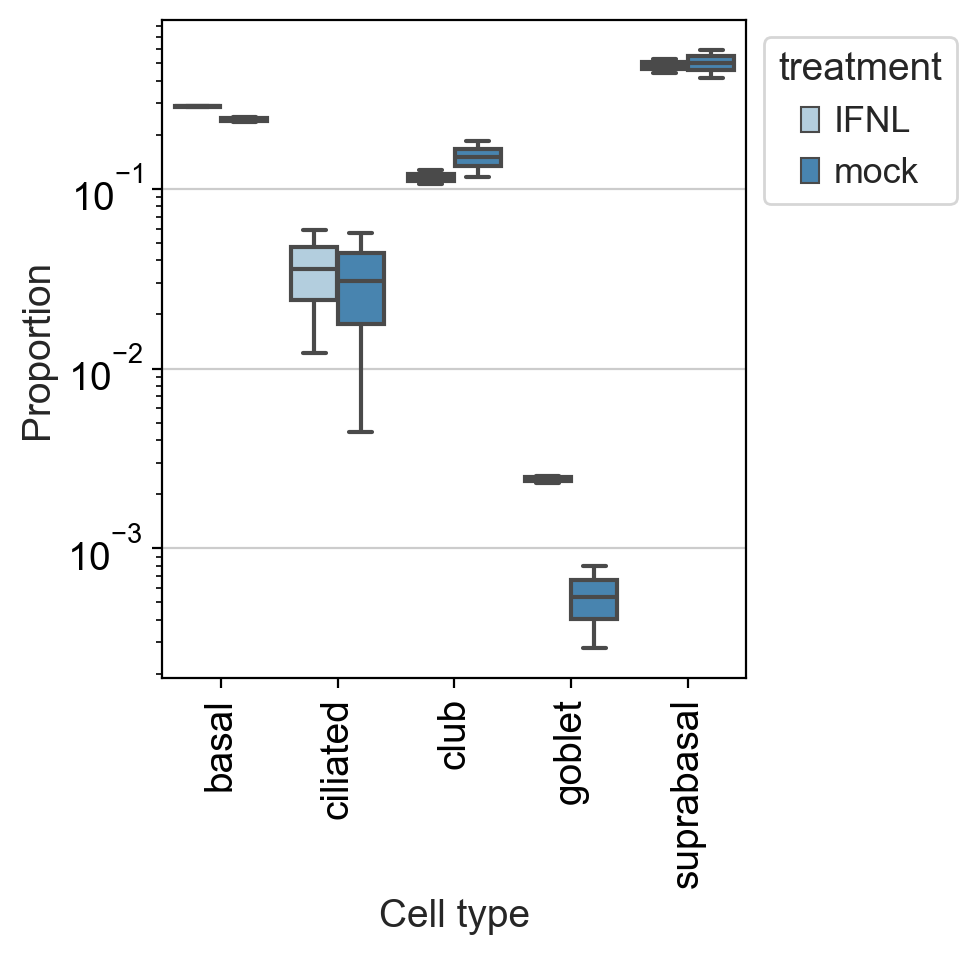

In [128]:
viz.boxplots(ifnl_subset, feature_name="treatment", figsize=(5, 5), cell_types=['goblet', 'ciliated', 'basal', 'suprabasal', 'club'])
plt.yscale('log')

In [130]:
adata.obs['treatment_infection'] = adata.obs.treatment.astype(str) + '_' + adata.obs.infected.astype(str)

/tmp/ipykernel_2597917/2056750158.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['treatment_infection'] = adata.obs.treatment.astype(str) + '_' + adata.obs.infected.astype(str)


/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Param

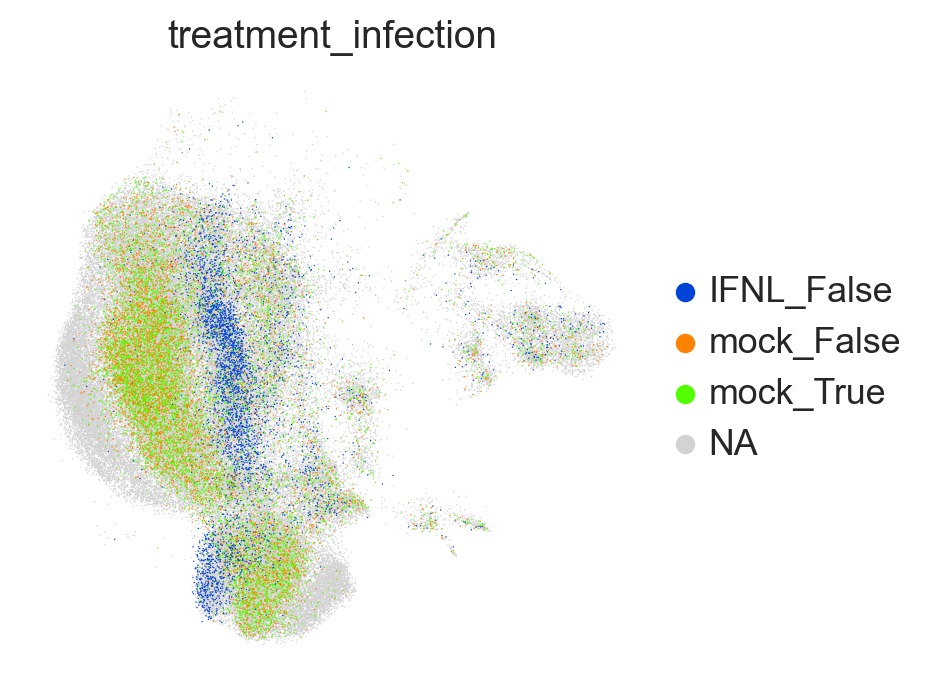

In [137]:
sc.pl.umap(adata[adata.obs.patient.isin(['patient_3', 'patient_4'])], color='treatment_infection', groups=['IFNL_False', 'mock_True', 'mock_False'], palette='prism')

These all look terrible... can we get a percentage change plot?

In [73]:
df = pd.crosstab(adata.obs.infected, adata.obs.cell_type)
df = pd.DataFrame(df.values[1]/df.values[0], index=df.columns)

/tmp/ipykernel_2597917/3280191715.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


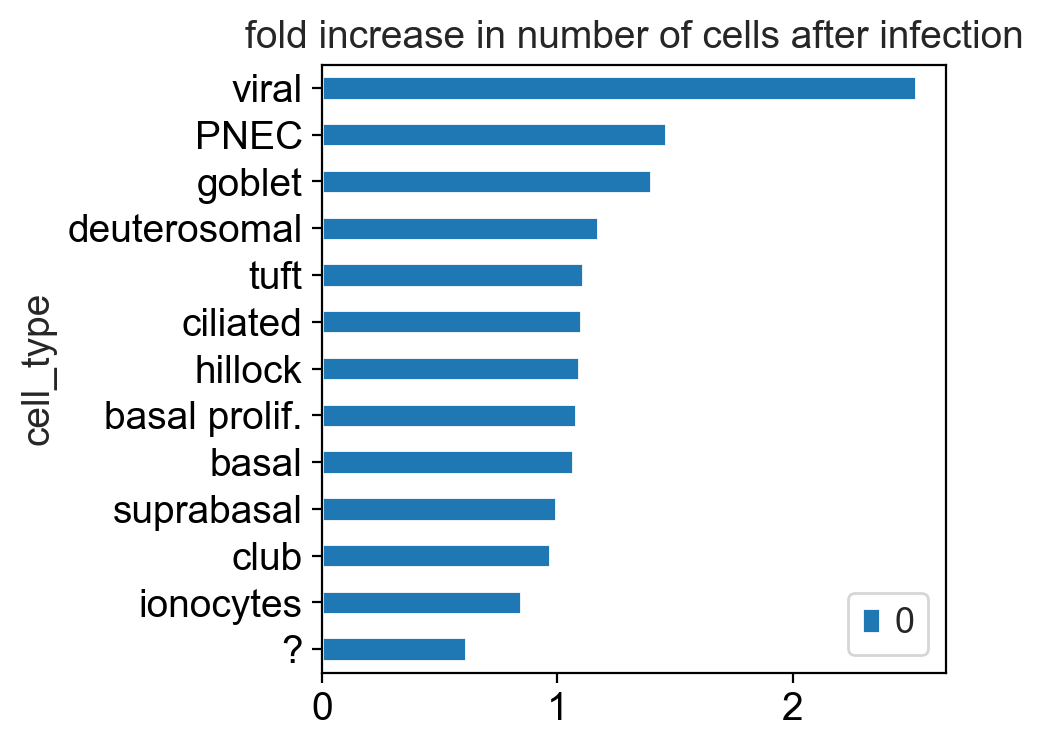

In [77]:
df.sort_values(by=0).plot.barh()
plt.title('fold increase in number of cells after infection')
plt.grid(b=None)

Get significant effects:

In [83]:
data_all.obs['infected'] = data_all.obs['infected'].astype(str)

In [86]:
# model = mod.CompositionalAnalysis(data_all, formula="infected", reference_cell_type="automatic")
model = mod.CompositionalAnalysis(data_all, formula="C(treatment, infected('IFNL'))", reference_cell_type="automatic")
# sim_results = model.sample_hmc()

PatsyError: Error evaluating factor: TypeError: 'Series' object is not callable
    C(treatment, infected('IFNL'))
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [17]:
sim_results.save('2302_scCODA_infected')

In [18]:
sim_results.summary();

Compositional Analysis summary:

Data: 95 samples, 13 cell types
Reference index: 6
Formula: infected

Intercepts:
               Final Parameter  Expected Sample
Cell Type                                      
?                       -1.245        44.089071
PNEC                    -1.745        26.741374
basal                    0.993       413.315795
basal prolif.           -0.741        72.981934
ciliated                -0.782        70.050187
club                     1.209       512.967216
deuterosomal            -1.094        51.275443
goblet                  -1.138        49.068238
hillock                 -0.843        65.904844
ionocytes               -1.278        42.657877
suprabasal               1.152       484.545790
tuft                    -1.402        37.683108
viral                   -1.300        41.729651


Effects:
                                Final Parameter  Expected Sample  \
Covariate        Cell Type                                         
infected[T.True] ?

In [47]:
sim_results.effect_df

Final Parameter  HDI 3%  HDI 97%     SD  \
Covariate        Cell Type                                                
infected[T.True] ?                          0.0  -0.167    0.177  0.059   
                 PNEC                       0.0  -0.148    0.161  0.055   
                 basal                      0.0  -0.108    0.166  0.051   
                 basal prolif.              0.0  -0.124    0.176  0.053   
                 ciliated                   0.0  -0.148    0.177  0.059   
                 club                       0.0  -0.135    0.128  0.045   
                 deuterosomal               0.0   0.000    0.000  0.000   
                 goblet                     0.0  -0.177    0.173  0.061   
                 hillock                    0.0  -0.183    0.147  0.061   
                 ionocytes                  0.0  -0.180    0.158  0.057   
                 suprabasal                 0.0  -0.212    0.055  0.057   
                 tuft                       0.0  -0.163    0.170  0.057   
                 viral                      0.0  -0.116    0.261  0.073   

                                Inclusion probability  Expected Sample  \
Covariate        Cell Type                                               
infected[T.True] ?                           0.456600        44.089071   
                 PNEC                        0.496467        26.741374   
                 basal                       0.512000       413.315795   
                 basal prolif.               0.446000        72.981934   
                 ciliated                    0.492133        70.050187   
                 club                        0.473467       512.967216   
                 deuterosomal                0.000000        51.275443   
                 goblet                      0.496133        49.068238   
                 hillock                     0.490333        65.904844   
                 ionocytes                   0.431667        42.657877   
                 suprabasal                  0.489933       484.545790   
                 tuft                        0.482133        37.683108   
                 viral                       0.479533        41.729651   

                                log2-fold change  
Covariate        Cell Type                        
infected[T.True] ?                           0.0  
                 PNEC                        0.0  
                 basal                       0.0  
                 basal prolif.               0.0  
                 ciliated                    0.0  
                 club                        0.0  
                 deuterosomal                0.0  
                 goblet                      0.0  
                 hillock                     0.0  
                 ionocytes                   0.0  
                 suprabasal                  0.0  
                 tuft                        0.0  
                 viral                       0.0

In [46]:
sim_results.set_fdr(est_fdr=0.05)
sim_results.effect_df[sim_results.effect_df['Final Parameter'] != 0]  # significant

,,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Covariate,Cell Type,,,,,,,


Infection did not have a significant effect on cell type proportions, as we also see from the abundances above.

### treatment based models

In [87]:
# viz.boxplots(data_all, feature_name="treatment", figsize=(20, 5))

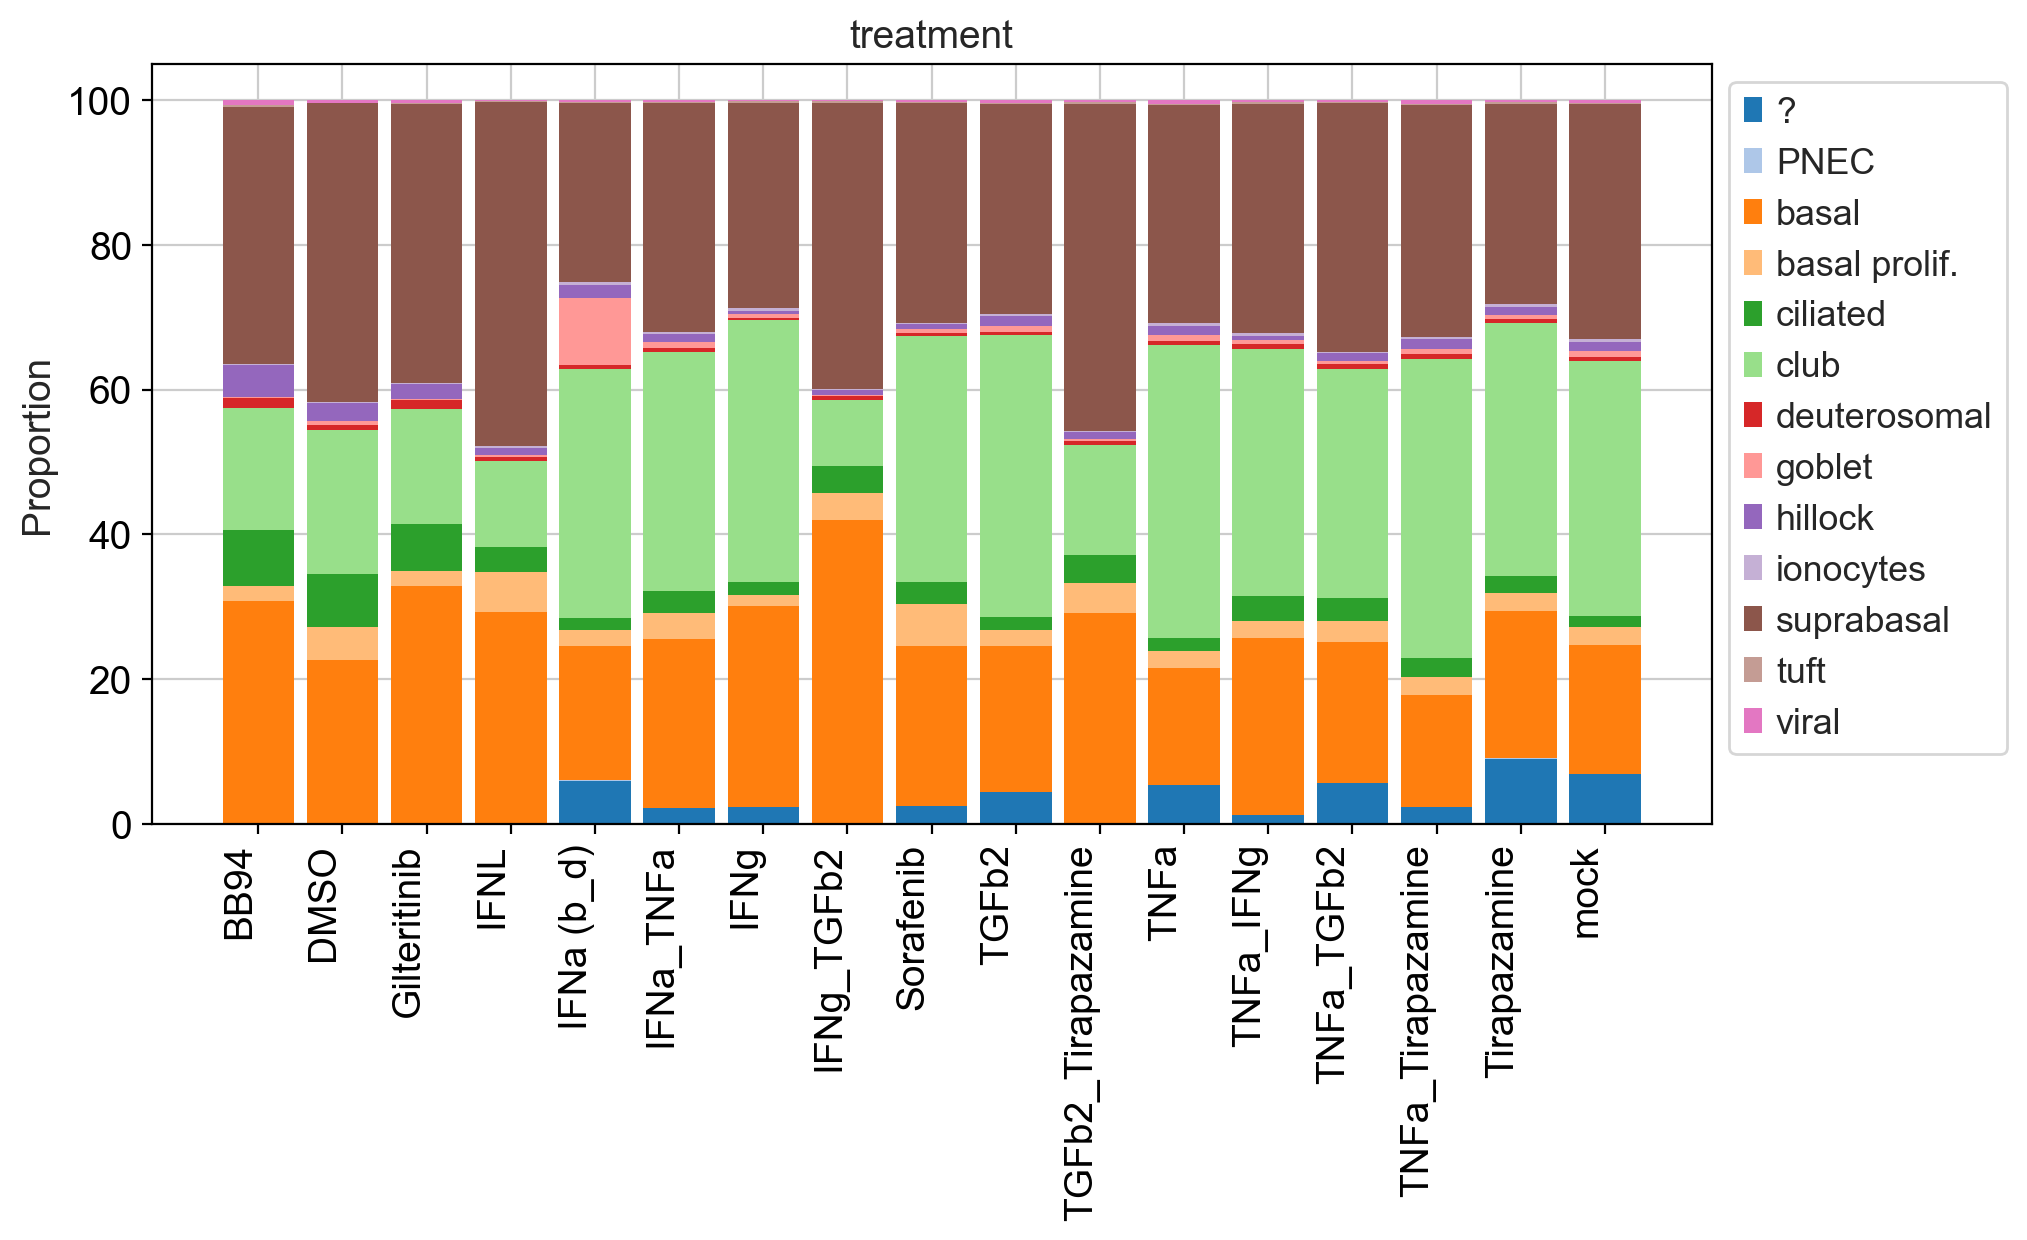

In [88]:
g = viz.stacked_barplot(data_all, feature_name="treatment", figsize=(10, 5))
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')
plt.show()

The same, but split by infection.

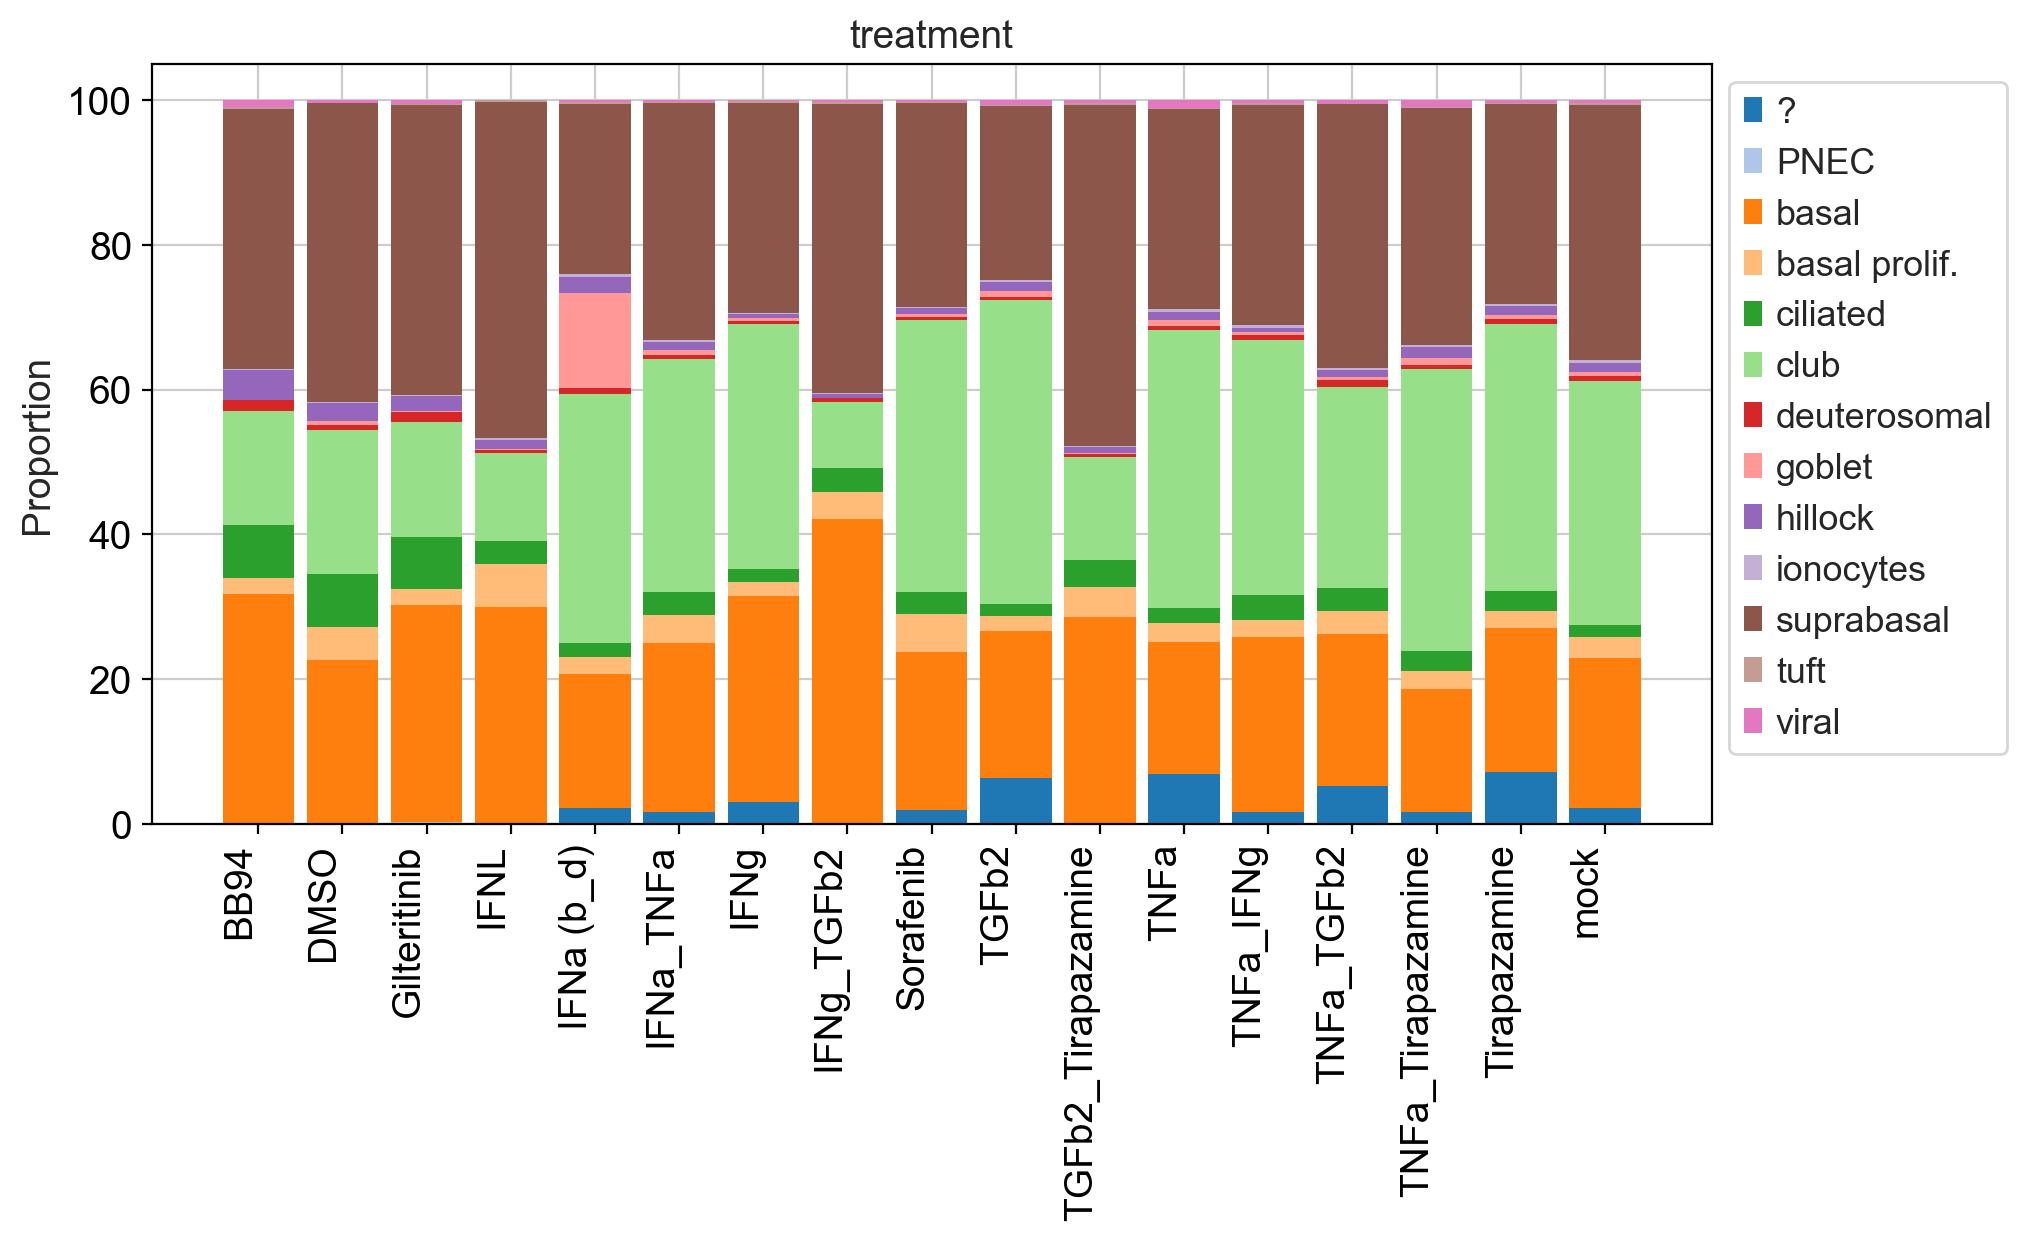

In [89]:
g = viz.stacked_barplot(data_all[data_all.obs.infected == 'True'], feature_name="treatment", figsize=(10, 5))
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')
plt.show()

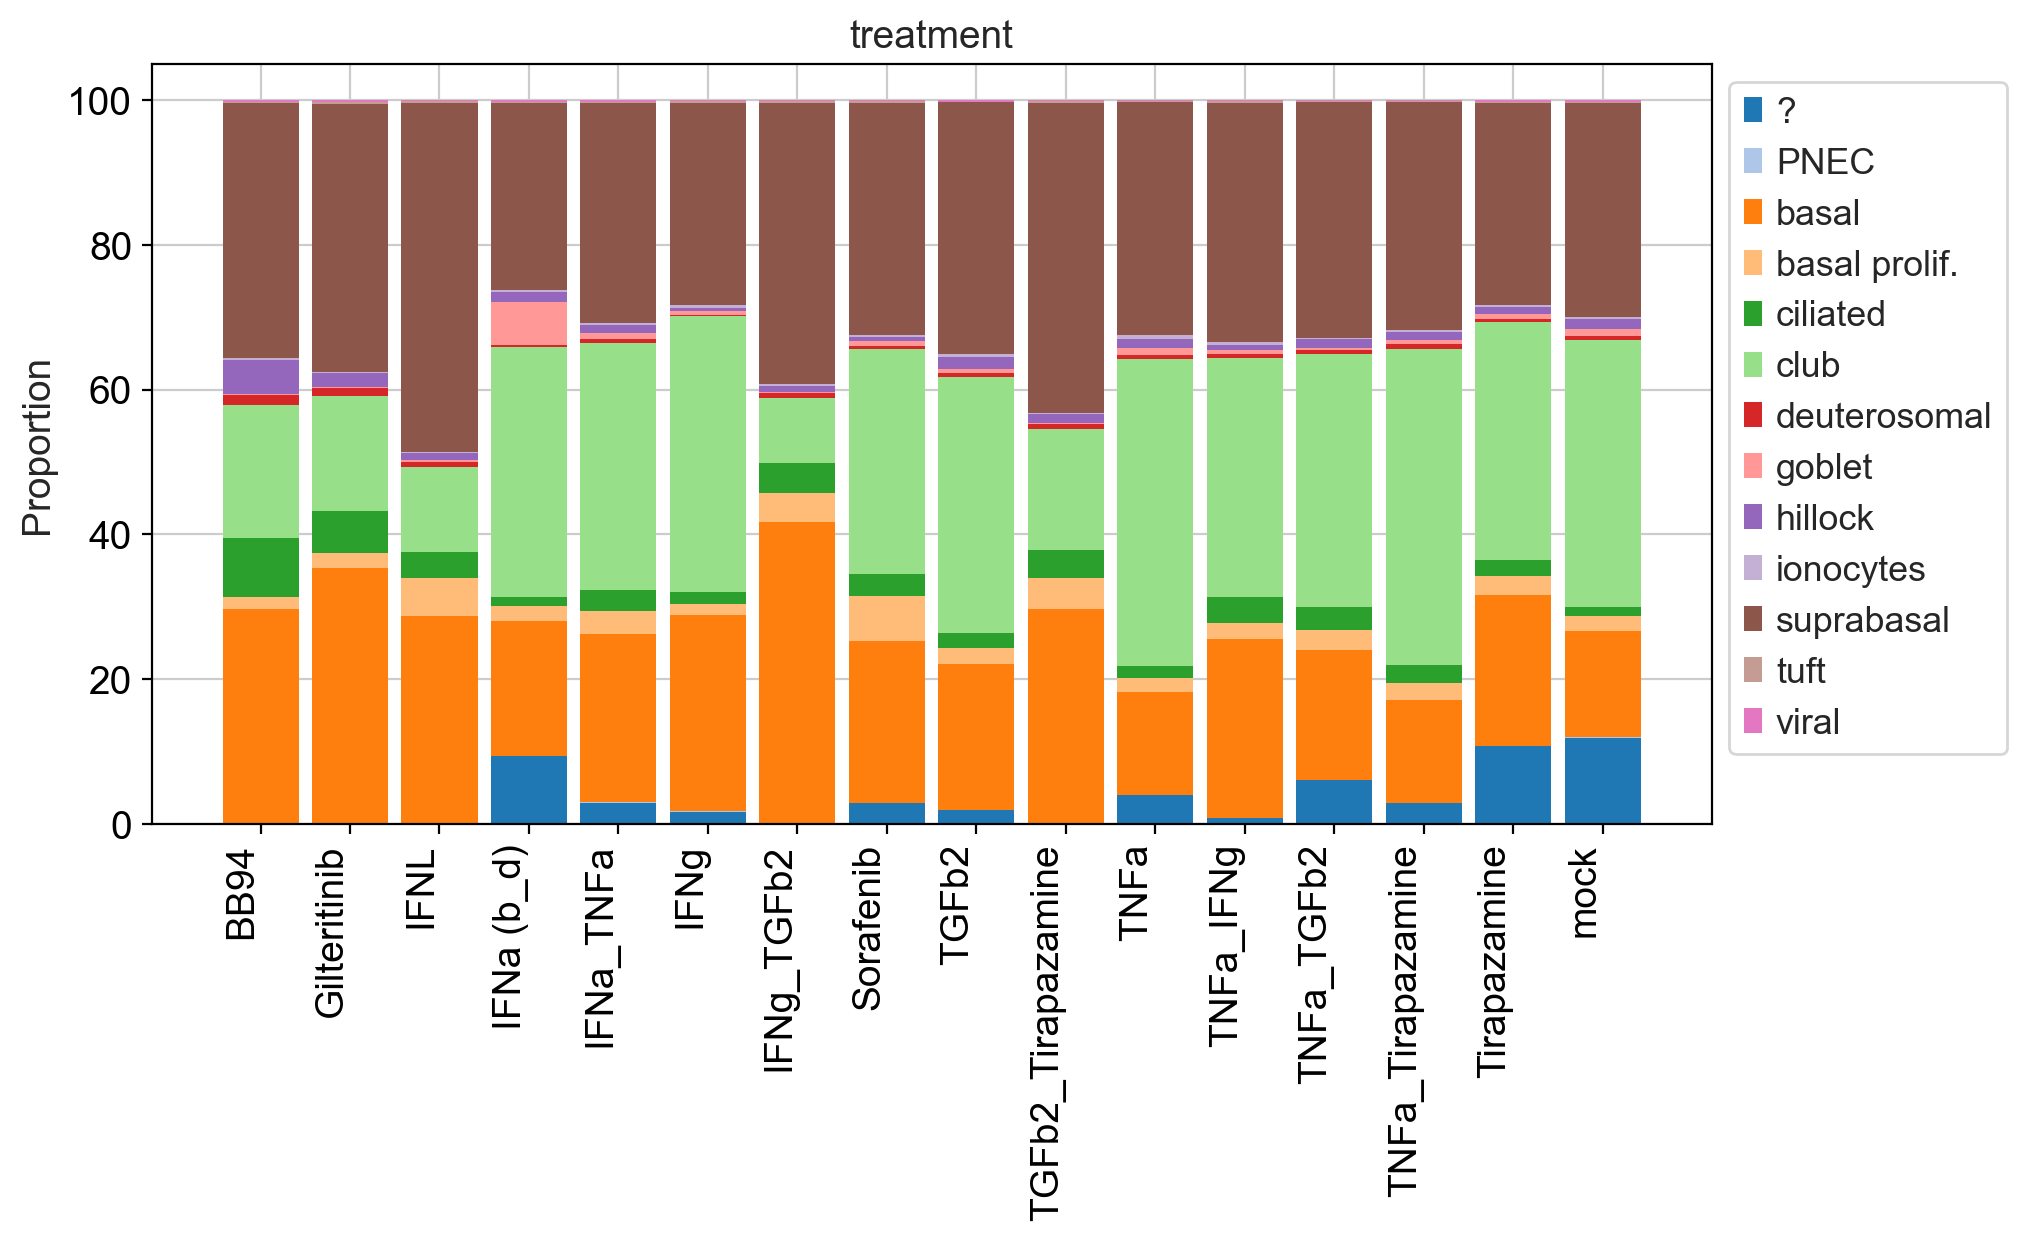

In [90]:
g = viz.stacked_barplot(data_all[data_all.obs.infected == 'False'], feature_name="treatment", figsize=(10, 5))
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')
plt.show()

Train a model to quantify the compositional change and estimate significance.

In [91]:
model = mod.CompositionalAnalysis(data_all, formula="treatment", reference_cell_type="automatic")
sim_results = model.sample_hmc()

Automatic reference selection! Reference cell type set to deuterosomal
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:44<00:00, 121.29it/s]


MCMC sampling finished. (207.495 sec)
Acceptance rate: 61.0%


In [92]:
sim_results.save('2302_scCODA_treatment')

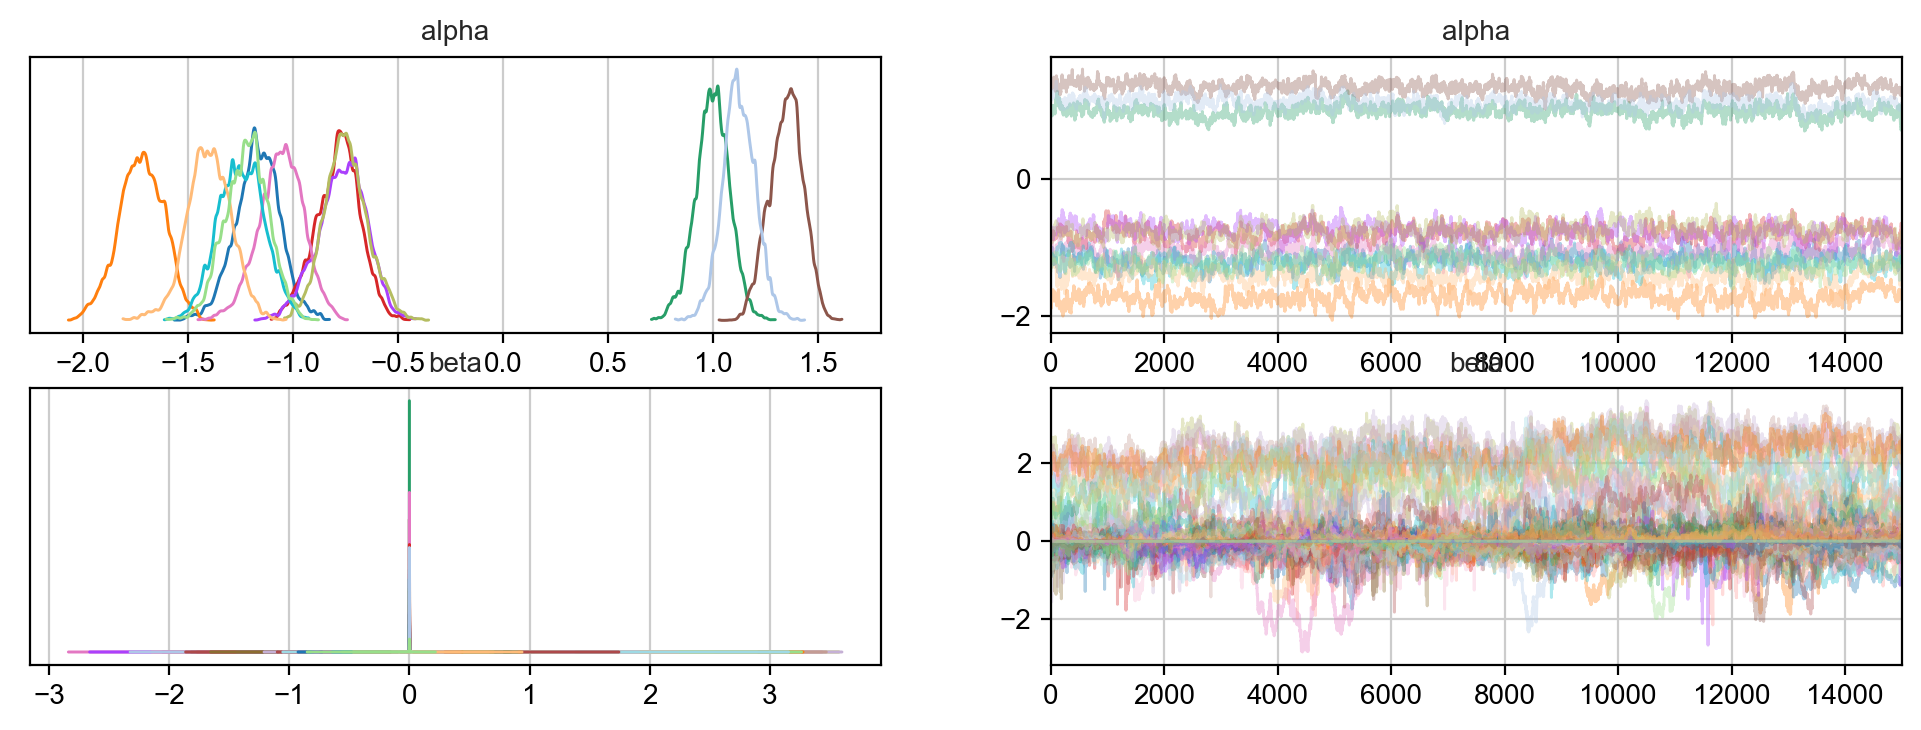

In [93]:
import arviz as az
az.plot_trace(
    sim_results,
    divergences=False,
    var_names=["alpha", "beta"],
    coords={"cell_type": sim_results.posterior.coords["cell_type_nb"]},
)
plt.show()

Generate the effect and intercept dfs.

In [94]:
sim_results.summary();

Compositional Analysis summary:

Data: 95 samples, 13 cell types
Reference index: 6
Formula: treatment

Intercepts:
               Final Parameter  Expected Sample
Cell Type                                      
?                       -1.169        45.597523
PNEC                    -1.720        26.281188
basal                    0.995       396.967095
basal prolif.           -0.785        66.943795
ciliated                -0.767        68.159694
club                     1.346       563.886727
deuterosomal            -1.035        52.135880
goblet                  -1.057        51.001416
hillock                 -0.747        69.536611
ionocytes               -1.246        42.218284
suprabasal               1.122       450.723195
tuft                    -1.399        36.228764
viral                   -1.220        43.330353


Effects:
                                 Final Parameter  Expected Sample  \
Covariate         Cell Type                                         
treatment[T.DMS

In [95]:
sim_results.effect_df[sim_results.effect_df['Final Parameter'] != 0]

Final Parameter  HDI 3%  \
Covariate                       Cell Type                                
treatment[T.DMSO]               suprabasal           -0.005608  -0.650   
treatment[T.Gilteritinib]       ?                    -0.230714  -0.752   
treatment[T.IFNL]               basal                 2.228982   1.515   
                                basal prolif.         2.370391   1.582   
                                ciliated              1.696264   0.763   
                                club                  1.044985   0.368   
                                suprabasal            2.584771   1.862   
treatment[T.IFNg_TGFb2]         basal                 2.382484   1.765   
                                basal prolif.         1.834708   1.001   
                                ciliated              1.570148   0.809   
                                suprabasal            2.190852   1.613   
treatment[T.Sorafenib]          PNEC                 -0.112572  -0.577   
treatment[T.TGFb2]              tuft                  0.061116  -0.122   
treatment[T.TGFb2_Tirapazamine] basal                 1.610309   0.841   
                                basal prolif.         1.370060   0.336   
                                suprabasal            1.932182   1.165   
                                tuft                  0.338043  -0.558   
treatment[T.TNFa]               basal                -0.098716  -0.368   
                                ionocytes             0.032277  -0.307   
treatment[T.TNFa_TGFb2]         ?                    -0.021869  -0.275   
                                basal                -0.024630  -0.342   
treatment[T.TNFa_Tirapazamine]  basal                -0.150645  -0.539   
                                hillock              -0.047174  -0.372   
                                ionocytes             0.016556  -0.261   
treatment[T.Tirapazamine]       ciliated             -0.101949  -0.495   
                                suprabasal           -0.269956  -0.685   
treatment[T.mock]               PNEC                  0.051593  -0.087   

                                               HDI 97%     SD  \
Covariate                       Cell Type                       
treatment[T.DMSO]               suprabasal       0.588  0.290   
treatment[T.Gilteritinib]       ?                0.103  0.250   
treatment[T.IFNL]               basal            2.848  0.360   
                                basal prolif.    3.139  0.419   
                                ciliated         2.675  0.538   
                                club             1.668  0.419   
                                suprabasal       3.226  0.375   
treatment[T.IFNg_TGFb2]         basal            2.978  0.341   
                                basal prolif.    2.601  0.430   
                                ciliated         2.239  0.385   
                                suprabasal       2.846  0.346   
treatment[T.Sorafenib]          PNEC             0.279  0.220   
treatment[T.TGFb2]              tuft             0.323  0.109   
treatment[T.TGFb2_Tirapazamine] basal            2.382  0.423   
                                basal prolif.    2.371  0.564   
                                suprabasal       2.702  0.431   
                                tuft             1.460  0.523   
treatment[T.TNFa]               basal            0.080  0.130   
                                ionocytes        0.407  0.183   
treatment[T.TNFa_TGFb2]         ?                0.199  0.118   
                                basal            0.273  0.166   
treatment[T.TNFa_Tirapazamine]  basal            0.138  0.185   
                                hillock          0.216  0.141   
                                ionocytes        0.355  0.141   
treatment[T.Tirapazamine]       ciliated         0.081  0.153   
                                suprabasal      -0.000  0.202   
treatment[T.mock]               PNEC             0.247  0.084   

              

Set a different FDR threshold.

In [97]:
sim_results.set_fdr(est_fdr=0.05)
sim_results.effect_df[sim_results.effect_df['Final Parameter'] != 0]

Final Parameter  HDI 3%  \
Covariate                       Cell Type                                
treatment[T.DMSO]               suprabasal           -0.005608  -0.650   
treatment[T.Gilteritinib]       ?                    -0.230714  -0.752   
treatment[T.IFNL]               basal                 2.228982   1.515   
                                basal prolif.         2.370391   1.582   
                                ciliated              1.696264   0.763   
                                club                  1.044985   0.368   
                                suprabasal            2.584771   1.862   
treatment[T.IFNg_TGFb2]         basal                 2.382484   1.765   
                                basal prolif.         1.834708   1.001   
                                ciliated              1.570148   0.809   
                                suprabasal            2.190852   1.613   
treatment[T.Sorafenib]          PNEC                 -0.112572  -0.577   
treatment[T.TGFb2]              tuft                  0.061116  -0.122   
treatment[T.TGFb2_Tirapazamine] basal                 1.610309   0.841   
                                basal prolif.         1.370060   0.336   
                                suprabasal            1.932182   1.165   
                                tuft                  0.338043  -0.558   
treatment[T.TNFa]               basal                -0.098716  -0.368   
                                ionocytes             0.032277  -0.307   
treatment[T.TNFa_TGFb2]         ?                    -0.021869  -0.275   
                                basal                -0.024630  -0.342   
treatment[T.TNFa_Tirapazamine]  basal                -0.150645  -0.539   
                                hillock              -0.047174  -0.372   
                                ionocytes             0.016556  -0.261   
treatment[T.Tirapazamine]       ciliated             -0.101949  -0.495   
                                suprabasal           -0.269956  -0.685   
treatment[T.mock]               PNEC                  0.051593  -0.087   

                                               HDI 97%     SD  \
Covariate                       Cell Type                       
treatment[T.DMSO]               suprabasal       0.588  0.290   
treatment[T.Gilteritinib]       ?                0.103  0.250   
treatment[T.IFNL]               basal            2.848  0.360   
                                basal prolif.    3.139  0.419   
                                ciliated         2.675  0.538   
                                club             1.668  0.419   
                                suprabasal       3.226  0.375   
treatment[T.IFNg_TGFb2]         basal            2.978  0.341   
                                basal prolif.    2.601  0.430   
                                ciliated         2.239  0.385   
                                suprabasal       2.846  0.346   
treatment[T.Sorafenib]          PNEC             0.279  0.220   
treatment[T.TGFb2]              tuft             0.323  0.109   
treatment[T.TGFb2_Tirapazamine] basal            2.382  0.423   
                                basal prolif.    2.371  0.564   
                                suprabasal       2.702  0.431   
                                tuft             1.460  0.523   
treatment[T.TNFa]               basal            0.080  0.130   
                                ionocytes        0.407  0.183   
treatment[T.TNFa_TGFb2]         ?                0.199  0.118   
                                basal            0.273  0.166   
treatment[T.TNFa_Tirapazamine]  basal            0.138  0.185   
                                hillock          0.216  0.141   
                                ionocytes        0.355  0.141   
treatment[T.Tirapazamine]       ciliated         0.081  0.153   
                                suprabasal      -0.000  0.202   
treatment[T.mock]               PNEC             0.247  0.084   

              

#### per treatment results

In [ ]:
results = {}
for t in adata.obs.treatment.unique():
    data_t = data_all[data_all.obs["treatment"].isin(["mock", t])]
    model_t = mod.CompositionalAnalysis(data_all, formula=f"C(treatment, Treatment('{t}'))", reference_cell_type="automatic")
    print(t)
    results[t] = model_t.sample_hmc()

Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
TNFa_IFNg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:51<00:00, 37.61it/s]


MCMC sampling finished. (662.540 sec)
Acceptance rate: 44.9%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
IFNa (b_d)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:41<00:00, 38.36it/s]


MCMC sampling finished. (651.979 sec)
Acceptance rate: 52.8%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
IFNg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:37<00:00, 38.67it/s]


MCMC sampling finished. (645.352 sec)
Acceptance rate: 38.1%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
Tirapazamine


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:13<00:00, 40.56it/s]


MCMC sampling finished. (607.288 sec)
Acceptance rate: 32.5%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
mock


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:37<00:00, 43.71it/s]


MCMC sampling finished. (572.795 sec)
Acceptance rate: 49.1%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
IFNa_TNFa


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:58<00:00, 41.81it/s]


MCMC sampling finished. (608.680 sec)
Acceptance rate: 58.3%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
TNFa


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:30<00:00, 39.21it/s]


MCMC sampling finished. (639.490 sec)
Acceptance rate: 36.2%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
Sorafenib


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:41<00:00, 38.34it/s]


MCMC sampling finished. (651.506 sec)
Acceptance rate: 56.1%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
TNFa_Tirapazamine


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:35<00:00, 38.80it/s]


MCMC sampling finished. (645.888 sec)
Acceptance rate: 58.2%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
TGFb2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:43<00:00, 38.20it/s]


MCMC sampling finished. (651.514 sec)
Acceptance rate: 50.1%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
TNFa_TGFb2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:46<00:00, 37.97it/s]


MCMC sampling finished. (656.218 sec)
Acceptance rate: 58.2%


/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/sccoda/util/result_classes.py:252: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Automatic reference selection! Reference cell type set to ionocytes
Zero counts encountered in data! Added a pseudocount of 0.5.
TGFb2_Tirapazamine


 32%|██████████████████████████████████████████████████████████████████▌                                                                                                                                               | 6339/20000 [02:44<05:52, 38.72it/s]

In [190]:
for k, res in results.items():
    print(k)
    display(res.effect_df[res.effect_df['Final Parameter'] != 0])

TNFa_IFNg


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa_IFNg'))[T.BB94]       basal                      0.272160   
                                                   suprabasal                 0.323226   
C(treatment, Treatment('TNFa_IFNg'))[T.DMSO]       suprabasal prolif.         0.019907   
C(treatment, Treatment('TNFa_IFNg'))[T.Gilterit... ciliated                   0.158369   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNL]       unk                       -0.149611   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNa_TNFa]  club                       0.142274   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNg]       ciliated                  -0.046456   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNg_TGFb2] basal                      2.076776   
                                                   ciliated                   1.271569   
                                                   club                       0.923581   
                                                   suprabasal                 2.280696   
                                                   suprabasal prolif.         1.638209   
C(treatment, Treatment('TNFa_IFNg'))[T.TGFb2_Ti... basal                      1.430361   
                                                   suprabasal                 1.601149   
                                                   suprabasal prolif.         0.902846   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('TNFa_IFNg'))[T.BB94]       basal               -0.336   
                                                   suprabasal          -0.204   
C(treatment, Treatment('TNFa_IFNg'))[T.DMSO]       suprabasal prolif.  -0.755   
C(treatment, Treatment('TNFa_IFNg'))[T.Gilterit... ciliated            -0.306   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNL]       unk                 -0.798   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNa_TNFa]  club                -0.055   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNg]       ciliated            -0.326   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNg_TGFb2] basal                1.402   
                                                   ciliated             0.436   
                                                   club                 0.291   
                                                   suprabasal           1.634   
                                                   suprabasal prolif.   0.835   
C(treatment, Treatment('TNFa_IFNg'))[T.TGFb2_Ti... basal                0.550   
                                                   suprabasal           0.821   
                                                   suprabasal prolif.  -0.353   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('TNFa_IFNg'))[T.BB94]       basal                 1.083   
                                                   suprabasal            1.014   
C(treatment, Treatment('TNFa_IFNg'))[T.DMSO]       suprabasal prolif.    0.943   
C(treatment, Treatment('TNFa_IFNg'))[T.Gilterit... ciliated              0.807   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNL]       unk                   0.488   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNa_TNFa]  club                  0.420   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNg]       ciliated              0.204   
C(treatment, Treatment('TNFa_IFNg'))[T.IFNg_TGFb2] basal                 2.796   
                                                   ciliated              2.026   
                                                   club                  1.556   
                                                   suprabasal            2.939   
                                                   suprabasal prolif.    2.384   
C(treatment, T

IFNa (b_d)


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('IFNa (b_d)'))[T.IFNL]      suprabasal                 0.310276   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNg_TG... basal                      1.570322   
                                                   suprabasal                 1.773938   
C(treatment, Treatment('IFNa (b_d)'))[T.TGFb2_T... basal                      1.553188   
                                                   suprabasal                 1.723286   
                                                   suprabasal prolif.         1.146038   
C(treatment, Treatment('IFNa (b_d)'))[T.TNFa_Ti... goblet                    -0.016317   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('IFNa (b_d)'))[T.IFNL]      suprabasal          -0.026   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNg_TG... basal                0.744   
                                                   suprabasal           0.914   
C(treatment, Treatment('IFNa (b_d)'))[T.TGFb2_T... basal                0.650   
                                                   suprabasal           0.910   
                                                   suprabasal prolif.   0.148   
C(treatment, Treatment('IFNa (b_d)'))[T.TNFa_Ti... goblet              -0.332   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNa (b_d)'))[T.IFNL]      suprabasal            0.715   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNg_TG... basal                 2.562   
                                                   suprabasal            2.697   
C(treatment, Treatment('IFNa (b_d)'))[T.TGFb2_T... basal                 2.441   
                                                   suprabasal            2.530   
                                                   suprabasal prolif.    2.239   
C(treatment, Treatment('IFNa (b_d)'))[T.TNFa_Ti... goblet                0.274   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNL]      suprabasal          0.240   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNg_TG... basal               0.526   
                                                   suprabasal          0.513   
C(treatment, Treatment('IFNa (b_d)'))[T.TGFb2_T... basal               0.495   
                                                   suprabasal          0.459   
                                                   suprabasal prolif.  0.575   
C(treatment, Treatment('IFNa (b_d)'))[T.TNFa_Ti... goblet              0.146   

                                                                       Inclusion probability  \
Covariate                                          Cell Type                                   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNL]      suprabasal                         0.8844   
C(treatment, Treatment('IFNa (b_d)'))[T.IFNg_TG... basal                              1.0000   
                                                   suprabasal                         1.0000   
C(treatment, Treatment('IFNa (b_d)'))[T.TGFb2_T... basal                              1.0000   
                                                   suprabasal                         1.0000   
                                                   suprabasal prolif.                 1.0000   
C(treatment, Treatment('IFNa (b_d)'))[T.TNFa_Ti... goblet                             0.8644   

                                                                       Expected Sample  \
Covariate                                          Cell Type                             
C(treatment, Treatment('I

IFNg


Final Parameter  \
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNg'))[T.IFNg_TGFb2]      basal              1.197569   
                                                   suprabasal         1.386463   
C(treatment, Treatment('IFNg'))[T.TGFb2_Tirapaz... suprabasal         1.016876   

                                                               HDI 3%  \
Covariate                                          Cell Type            
C(treatment, Treatment('IFNg'))[T.IFNg_TGFb2]      basal       -0.351   
                                                   suprabasal   0.424   
C(treatment, Treatment('IFNg'))[T.TGFb2_Tirapaz... suprabasal  -0.079   

                                                               HDI 97%     SD  \
Covariate                                          Cell Type                    
C(treatment, Treatment('IFNg'))[T.IFNg_TGFb2]      basal         2.220  0.713   
                                                   suprabasal    2.450  0.576   
C(treatment, Treatment('IFNg'))[T.TGFb2_Tirapaz... suprabasal    2.012  0.620   

                                                               Inclusion probability  \
Covariate                                          Cell Type                           
C(treatment, Treatment('IFNg'))[T.IFNg_TGFb2]      basal                    0.913667   
                                                   suprabasal               1.000000   
C(treatment, Treatment('IFNg'))[T.TGFb2_Tirapaz... suprabasal               0.989733   

                                                               Expected Sample  \
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNg'))[T.IFNg_TGFb2]      basal            569.972247   
                                                   suprabasal      1129.445181   
C(treatment, Treatment('IFNg'))[T.TGFb2_Tirapaz... suprabasal      1147.108841   

                                                               log2-fold change  
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNg'))[T.IFNg_TGFb2]      basal               0.629813  
                                                   suprabasal          0.902330  
C(treatment, Treatment('IFNg'))[T.TGFb2_Tirapaz... suprabasal          0.924718

Tirapazamine


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('Tirapazamine'))[T.IFNg_... basal                      2.098890   
                                                   ciliated                   1.246592   
                                                   club                       0.997561   
                                                   suprabasal                 2.258831   
                                                   suprabasal prolif.         1.723654   
C(treatment, Treatment('Tirapazamine'))[T.Soraf... viral                     -0.141688   
C(treatment, Treatment('Tirapazamine'))[T.TGFb2... basal                      1.423582   
                                                   suprabasal                 1.571624   
C(treatment, Treatment('Tirapazamine'))[T.TNFa]    club                       0.092733   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('Tirapazamine'))[T.IFNg_... basal                1.130   
                                                   ciliated             0.179   
                                                   club                 0.368   
                                                   suprabasal           1.365   
                                                   suprabasal prolif.   0.932   
C(treatment, Treatment('Tirapazamine'))[T.Soraf... viral               -0.581   
C(treatment, Treatment('Tirapazamine'))[T.TGFb2... basal                0.460   
                                                   suprabasal           0.773   
C(treatment, Treatment('Tirapazamine'))[T.TNFa]    club                -0.105   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('Tirapazamine'))[T.IFNg_... basal                 2.835   
                                                   ciliated              2.208   
                                                   club                  1.687   
                                                   suprabasal            2.977   
                                                   suprabasal prolif.    2.638   
C(treatment, Treatment('Tirapazamine'))[T.Soraf... viral                 0.188   
C(treatment, Treatment('Tirapazamine'))[T.TGFb2... basal                 2.406   
                                                   suprabasal            2.477   
C(treatment, Treatment('Tirapazamine'))[T.TNFa]    club                  0.377   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('Tirapazamine'))[T.IFNg_... basal               0.455   
                                                   ciliated            0.533   
                                                   club                0.457   
                                                   suprabasal          0.439   
                                                   suprabasal prolif.  0.499   
C(treatment, Treatment('Tirapazamine'))[T.Soraf... viral               0.197   
C(treatment, Treatment('Tirapazamine'))[T.TGFb2... basal               0.514   
                                                   suprabasal          0.490   
C(treatment, Treatment('Tirapazamine'))[T.TNFa]    club                0.129   

                                                                       Inclusion probability  \
Covariate                                          Cell Type                                   
C(treatment, Treatment('Tirapazamine'))[T.IFNg_... basal                            1.000000   
                                                   ciliated                         0.998333   
                    

mock


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('mock'))[T.IFNa (b_d)]      goblet                     0.214793   
C(treatment, Treatment('mock'))[T.IFNg_TGFb2]      basal                      1.631629   
                                                   suprabasal                 1.809960   
                                                   suprabasal prolif.         1.266430   
C(treatment, Treatment('mock'))[T.TGFb2_Tirapaz... basal                      1.282119   
                                                   suprabasal                 1.357936   
C(treatment, Treatment('mock'))[T.TNFa_IFNg]       basal                      0.136551   
C(treatment, Treatment('mock'))[T.TNFa_TGFb2]      suprabasal prolif.        -0.134452   
C(treatment, Treatment('mock'))[T.Tirapazamine]    goblet                    -0.027958   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('mock'))[T.IFNa (b_d)]      goblet              -0.094   
C(treatment, Treatment('mock'))[T.IFNg_TGFb2]      basal                0.755   
                                                   suprabasal           0.880   
                                                   suprabasal prolif.   0.305   
C(treatment, Treatment('mock'))[T.TGFb2_Tirapaz... basal                0.415   
                                                   suprabasal           0.646   
C(treatment, Treatment('mock'))[T.TNFa_IFNg]       basal               -0.152   
C(treatment, Treatment('mock'))[T.TNFa_TGFb2]      suprabasal prolif.  -0.525   
C(treatment, Treatment('mock'))[T.Tirapazamine]    goblet              -0.313   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('mock'))[T.IFNa (b_d)]      goblet                0.719   
C(treatment, Treatment('mock'))[T.IFNg_TGFb2]      basal                 2.542   
                                                   suprabasal            2.747   
                                                   suprabasal prolif.    2.241   
C(treatment, Treatment('mock'))[T.TGFb2_Tirapaz... basal                 2.207   
                                                   suprabasal            2.424   
C(treatment, Treatment('mock'))[T.TNFa_IFNg]       basal                 0.591   
C(treatment, Treatment('mock'))[T.TNFa_TGFb2]      suprabasal prolif.    0.187   
C(treatment, Treatment('mock'))[T.Tirapazamine]    goblet                0.268   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('mock'))[T.IFNa (b_d)]      goblet              0.236   
C(treatment, Treatment('mock'))[T.IFNg_TGFb2]      basal               0.512   
                                                   suprabasal          0.537   
                                                   suprabasal prolif.  0.543   
C(treatment, Treatment('mock'))[T.TGFb2_Tirapaz... basal               0.513   
                                                   suprabasal          0.429   
C(treatment, Treatment('mock'))[T.TNFa_IFNg]       basal               0.199   
C(treatment, Treatment('mock'))[T.TNFa_TGFb2]      suprabasal prolif.  0.185   
C(treatment, Treatment('mock'))[T.Tirapazamine]    goblet              0.134   

                                                                       Inclusion probability  \
Covariate                                          Cell Type                                   
C(treatment, Treatment('mock'))[T.IFNa (b_d)]      goblet                           0.894200   
C(treatment, Treatment('mock'))[T.IFNg_TGFb2]      basal                            1.000000   
                    

IFNa_TNFa


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('IFNa_TNFa'))[T.BB94]       ciliated                   0.417330   
C(treatment, Treatment('IFNa_TNFa'))[T.DMSO]       basal                      0.289441   
C(treatment, Treatment('IFNa_TNFa'))[T.Gilterit... ciliated                   0.131557   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNL]       suprabasal prolif.         0.153403   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNg]       suprabasal                -0.247257   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNg_TGFb2] basal                      2.158478   
                                                   ciliated                   1.314368   
                                                   club                       0.935801   
                                                   suprabasal                 2.286976   
                                                   suprabasal prolif.         1.750359   
C(treatment, Treatment('IFNa_TNFa'))[T.TGFb2_Ti... basal                      1.552315   
                                                   goblet                     0.032268   
                                                   suprabasal                 1.684457   
                                                   suprabasal prolif.         1.283594   
C(treatment, Treatment('IFNa_TNFa'))[T.TNFa_IFNg]  suprabasal                -0.089151   
C(treatment, Treatment('IFNa_TNFa'))[T.mock]       goblet                    -0.015700   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('IFNa_TNFa'))[T.BB94]       ciliated            -0.263   
C(treatment, Treatment('IFNa_TNFa'))[T.DMSO]       basal               -0.553   
C(treatment, Treatment('IFNa_TNFa'))[T.Gilterit... ciliated            -0.571   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNL]       suprabasal prolif.  -0.378   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNg]       suprabasal          -0.624   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNg_TGFb2] basal                1.338   
                                                   ciliated             0.533   
                                                   club                 0.120   
                                                   suprabasal           1.559   
                                                   suprabasal prolif.   0.969   
C(treatment, Treatment('IFNa_TNFa'))[T.TGFb2_Ti... basal                0.234   
                                                   goblet              -0.769   
                                                   suprabasal           0.749   
                                                   suprabasal prolif.   0.190   
C(treatment, Treatment('IFNa_TNFa'))[T.TNFa_IFNg]  suprabasal          -0.331   
C(treatment, Treatment('IFNa_TNFa'))[T.mock]       goblet              -0.306   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNa_TNFa'))[T.BB94]       ciliated              1.246   
C(treatment, Treatment('IFNa_TNFa'))[T.DMSO]       basal                 1.308   
C(treatment, Treatment('IFNa_TNFa'))[T.Gilterit... ciliated              0.753   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNL]       suprabasal prolif.    0.869   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNg]       suprabasal            0.111   
C(treatment, Treatment('IFNa_TNFa'))[T.IFNg_TGFb2] basal                 2.864   
                                                   ciliated              2.149   
                                                   club                  1.728   
                                                   suprabasal            3.029   
                                                   suprabasal prolif.    2.536   
C(treat

TNFa


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal                      1.151788   
                                                   suprabasal                 1.366341   
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal                 1.371878   
                                                   suprabasal prolif.         0.832100   
C(treatment, Treatment('TNFa'))[T.TNFa_TGFb2]      ciliated                   0.025007   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal                0.395   
                                                   suprabasal           0.780   
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal           0.281   
                                                   suprabasal prolif.  -0.149   
C(treatment, Treatment('TNFa'))[T.TNFa_TGFb2]      ciliated            -0.293   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal                 1.780   
                                                   suprabasal            1.942   
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal            2.316   
                                                   suprabasal prolif.    2.036   
C(treatment, Treatment('TNFa'))[T.TNFa_TGFb2]      ciliated              0.321   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal               0.368   
                                                   suprabasal          0.299   
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal          0.605   
                                                   suprabasal prolif.  0.616   
C(treatment, Treatment('TNFa'))[T.TNFa_TGFb2]      ciliated            0.143   

                                                                       Inclusion probability  \
Covariate                                          Cell Type                                   
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal                            1.000000   
                                                   suprabasal                       1.000000   
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal                       0.950867   
                                                   suprabasal prolif.               0.971733   
C(treatment, Treatment('TNFa'))[T.TNFa_TGFb2]      ciliated                         0.882867   

                                                                       Expected Sample  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal                    536.477021   
                                                   suprabasal              1135.213294   
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal              1315.321557   
                                                   suprabasal prolif.       105.748000   
C(treatment, Treatment('TNFa'))[T.TNFa_TGFb2]      ciliated                  97.511526   

                                                                       log2-fold change  
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa'))[T.IFNg_TGFb2]      basal                       0.605974  
                                                   suprabasal                  0.915508  
C(treatment, Treatment('TNFa'))[T.TGFb2_Tirapaz... suprabasal           

Sorafenib


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('Sorafenib'))[T.IFNL]       basal                      0.440858   
                                                   suprabasal prolif.         0.476066   
C(treatment, Treatment('Sorafenib'))[T.IFNg_TGFb2] basal                      1.747106   
                                                   suprabasal                 1.872123   
                                                   suprabasal prolif.         1.358021   
C(treatment, Treatment('Sorafenib'))[T.TGFb2]      club                       0.032311   
C(treatment, Treatment('Sorafenib'))[T.TGFb2_Ti... basal                      1.373865   
                                                   ciliated                   0.767409   
                                                   suprabasal                 1.541622   
C(treatment, Treatment('Sorafenib'))[T.TNFa_Tir... ciliated                  -0.064606   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('Sorafenib'))[T.IFNL]       basal               -0.056   
                                                   suprabasal prolif.  -0.440   
C(treatment, Treatment('Sorafenib'))[T.IFNg_TGFb2] basal                0.631   
                                                   suprabasal           0.800   
                                                   suprabasal prolif.   0.284   
C(treatment, Treatment('Sorafenib'))[T.TGFb2]      club                -0.185   
C(treatment, Treatment('Sorafenib'))[T.TGFb2_Ti... basal                0.444   
                                                   ciliated            -0.014   
                                                   suprabasal           0.815   
C(treatment, Treatment('Sorafenib'))[T.TNFa_Tir... ciliated            -0.452   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('Sorafenib'))[T.IFNL]       basal                 1.072   
                                                   suprabasal prolif.    1.413   
C(treatment, Treatment('Sorafenib'))[T.IFNg_TGFb2] basal                 2.752   
                                                   suprabasal            3.045   
                                                   suprabasal prolif.    2.433   
C(treatment, Treatment('Sorafenib'))[T.TGFb2]      club                  0.258   
C(treatment, Treatment('Sorafenib'))[T.TGFb2_Ti... basal                 2.300   
                                                   ciliated              1.762   
                                                   suprabasal            2.467   
C(treatment, Treatment('Sorafenib'))[T.TNFa_Tir... ciliated              0.382   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('Sorafenib'))[T.IFNL]       basal               0.343   
                                                   suprabasal prolif.  0.544   
C(treatment, Treatment('Sorafenib'))[T.IFNg_TGFb2] basal               0.653   
                                                   suprabasal          0.622   
                                                   suprabasal prolif.  0.688   
C(treatment, Treatment('Sorafenib'))[T.TGFb2]      club                0.106   
C(treatment, Treatment('Sorafenib'))[T.TGFb2_Ti... basal               0.515   
                                                   ciliated            0.517   
                                                   suprabasal          0.458   
C(treatment, Treatment('Sorafenib'))[T.TNFa_Tir... ciliated            0.187   

                                                                       

TNFa_Tirapazamine


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                      0.431304   
                                                   suprabasal                 0.231343   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... club                      -0.215721   
                                                   goblet                    -0.064622   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... unk                        0.010554   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... ciliated                   0.087262   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                     -0.009934   
                                                   club                       0.013829   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... ciliated                   0.022264   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                      0.848468   
                                                   club                      -0.115572   
                                                   goblet                    -0.080139   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                      1.284064   
                                                   ciliated                   0.786199   
                                                   suprabasal                 1.454744   
                                                   suprabasal prolif.         0.820081   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... club                      -0.073592   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal               -0.021   
                                                   suprabasal          -0.271   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... club                -0.871   
                                                   goblet              -0.756   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... unk                 -0.617   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... ciliated            -0.032   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal               -0.240   
                                                   club                -0.235   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... ciliated            -0.330   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal               -0.092   
                                                   club                -0.923   
                                                   goblet              -0.803   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                0.692   
                                                   ciliated             0.154   
                                                   suprabasal           0.825   
                                                   suprabasal prolif.  -0.488   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... club                -0.328   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                 1.046   
                                                   suprabasal            0.902   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... club                  0.710   
                                                   goblet                0.424   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... unk                   0.659   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... ciliated              0.284   
C(treatment, Treatment('TNFa_Tirapazamine'))[T.... basal                 0.196   
                                                   club                  0.352   


TGFb2


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TGFb2'))[T.IFNL]           viral                     -0.262112   
C(treatment, Treatment('TGFb2'))[T.IFNa_TNFa]      suprabasal prolif.         0.062327   
C(treatment, Treatment('TGFb2'))[T.IFNg_TGFb2]     basal                      1.663678   
                                                   suprabasal                 1.827862   
                                                   suprabasal prolif.         1.368282   
C(treatment, Treatment('TGFb2'))[T.Sorafenib]      viral                      0.075929   
C(treatment, Treatment('TGFb2'))[T.TGFb2_Tirapa... basal                      1.423199   
                                                   suprabasal                 1.505926   
                                                   suprabasal prolif.         1.135907   
C(treatment, Treatment('TGFb2'))[T.TNFa]           club                       0.086497   
                                                   unk                       -0.020771   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('TGFb2'))[T.IFNL]           viral               -0.929   
C(treatment, Treatment('TGFb2'))[T.IFNa_TNFa]      suprabasal prolif.  -0.208   
C(treatment, Treatment('TGFb2'))[T.IFNg_TGFb2]     basal                0.870   
                                                   suprabasal           1.085   
                                                   suprabasal prolif.   0.221   
C(treatment, Treatment('TGFb2'))[T.Sorafenib]      viral               -0.124   
C(treatment, Treatment('TGFb2'))[T.TGFb2_Tirapa... basal                0.660   
                                                   suprabasal           0.722   
                                                   suprabasal prolif.   0.337   
C(treatment, Treatment('TGFb2'))[T.TNFa]           club                -0.089   
                                                   unk                 -0.273   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('TGFb2'))[T.IFNL]           viral                 0.307   
C(treatment, Treatment('TGFb2'))[T.IFNa_TNFa]      suprabasal prolif.    0.412   
C(treatment, Treatment('TGFb2'))[T.IFNg_TGFb2]     basal                 2.573   
                                                   suprabasal            2.745   
                                                   suprabasal prolif.    2.316   
C(treatment, Treatment('TGFb2'))[T.Sorafenib]      viral                 0.373   
C(treatment, Treatment('TGFb2'))[T.TGFb2_Tirapa... basal                 2.219   
                                                   suprabasal            2.343   
                                                   suprabasal prolif.    1.911   
C(treatment, Treatment('TGFb2'))[T.TNFa]           club                  0.357   
                                                   unk                   0.210   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('TGFb2'))[T.IFNL]           viral               0.411   
C(treatment, Treatment('TGFb2'))[T.IFNa_TNFa]      suprabasal prolif.  0.144   
C(treatment, Treatment('TGFb2'))[T.IFNg_TGFb2]     basal               0.476   
                                                   suprabasal          0.463   
                                                   suprabasal prolif.  0.673   
C(treatment, Treatment('TGFb2'))[T.Sorafenib]      viral               0.128   
C(treatment, Treatment('TGFb2'))[T.TGFb2_Tirapa... basal               0.419   
                                                   suprabas

TNFa_TGFb2


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNL]      suprabasal prolif.         0.417166   
                                                   unk                       -0.154619   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNg_TG... basal                      1.299472   
                                                   suprabasal                 1.485165   
                                                   suprabasal prolif.         0.963325   
C(treatment, Treatment('TNFa_TGFb2'))[T.TGFb2_T... suprabasal                 0.963217   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNL]      suprabasal prolif.  -0.036   
                                                   unk                 -0.683   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNg_TG... basal                0.755   
                                                   suprabasal           1.012   
                                                   suprabasal prolif.   0.216   
C(treatment, Treatment('TNFa_TGFb2'))[T.TGFb2_T... suprabasal           0.299   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNL]      suprabasal prolif.    1.221   
                                                   unk                   0.212   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNg_TG... basal                 1.912   
                                                   suprabasal            1.964   
                                                   suprabasal prolif.    1.833   
C(treatment, Treatment('TNFa_TGFb2'))[T.TGFb2_T... suprabasal            1.698   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNL]      suprabasal prolif.  0.368   
                                                   unk                 0.241   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNg_TG... basal               0.301   
                                                   suprabasal          0.258   
                                                   suprabasal prolif.  0.450   
C(treatment, Treatment('TNFa_TGFb2'))[T.TGFb2_T... suprabasal          0.390   

                                                                       Inclusion probability  \
Covariate                                          Cell Type                                   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNL]      suprabasal prolif.               0.892200   
                                                   unk                              0.891867   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNg_TG... basal                            1.000000   
                                                   suprabasal                       1.000000   
                                                   suprabasal prolif.               0.970600   
C(treatment, Treatment('TNFa_TGFb2'))[T.TGFb2_T... suprabasal                       0.988733   

                                                                       Expected Sample  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNL]      suprabasal prolif.       128.827159   
                                                   unk                       72.434732   
C(treatment, Treatment('TNFa_TGFb2'))[T.IFNg_TG... basal                    545.553578   
                                                   suprabasal              1135.120692   
                                                   suprabasal prolif.        96.703918   
C(tr

TGFb2_Tirapazamine


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal                      1.550929   
                                                   suprabasal                 1.689893   
                                                   suprabasal prolif.         1.212605   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet                     0.101076   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal                0.783   
                                                   suprabasal           0.907   
                                                   suprabasal prolif.   0.293   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet              -0.149   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal                 2.390   
                                                   suprabasal            2.473   
                                                   suprabasal prolif.    2.123   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet                0.550   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal               0.442   
                                                   suprabasal          0.429   
                                                   suprabasal prolif.  0.520   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet              0.177   

                                                                       Inclusion probability  \
Covariate                                          Cell Type                                   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal                            1.000000   
                                                   suprabasal                       1.000000   
                                                   suprabasal prolif.               0.970867   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet                           0.933000   

                                                                       Expected Sample  \
Covariate                                          Cell Type                             
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal                    596.800203   
                                                   suprabasal              1196.966796   
                                                   suprabasal prolif.        99.410537   
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet                    64.112165   

                                                                       log2-fold change  
Covariate                                          Cell Type                             
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... basal                       0.727671  
                                                   suprabasal                  0.928153  
                                                   suprabasal prolif.          0.239572  
C(treatment, Treatment('TGFb2_Tirapazamine'))[T... goblet                      0.142011

IFNL


Final Parameter  \
Covariate                                       Cell Type                             
C(treatment, Treatment('IFNL'))[T.DMSO]         suprabasal                 0.007271   
                                                suprabasal prolif.         0.290023   
C(treatment, Treatment('IFNL'))[T.Gilteritinib] goblet                    -0.248923   
C(treatment, Treatment('IFNL'))[T.IFNa_TNFa]    club                       0.189877   
C(treatment, Treatment('IFNL'))[T.IFNg]         basal                      0.328248   
C(treatment, Treatment('IFNL'))[T.IFNg_TGFb2]   ciliated                   0.465233   
                                                suprabasal                 1.204162   
C(treatment, Treatment('IFNL'))[T.Sorafenib]    goblet                    -0.029567   
                                                suprabasal prolif.         0.074905   
C(treatment, Treatment('IFNL'))[T.TGFb2]        goblet                     0.004420   
C(treatment, Treatment('IFNL'))[T.Tirapazamine] goblet                    -0.011140   
C(treatment, Treatment('IFNL'))[T.mock]         basal                     -0.045825   
                                                goblet                     0.060864   

                                                                    HDI 3%  \
Covariate                                       Cell Type                    
C(treatment, Treatment('IFNL'))[T.DMSO]         suprabasal          -0.393   
                                                suprabasal prolif.  -0.078   
C(treatment, Treatment('IFNL'))[T.Gilteritinib] goblet              -0.936   
C(treatment, Treatment('IFNL'))[T.IFNa_TNFa]    club                -0.002   
C(treatment, Treatment('IFNL'))[T.IFNg]         basal               -0.084   
C(treatment, Treatment('IFNL'))[T.IFNg_TGFb2]   ciliated            -0.318   
                                                suprabasal           0.530   
C(treatment, Treatment('IFNL'))[T.Sorafenib]    goblet              -0.589   
                                                suprabasal prolif.  -0.250   
C(treatment, Treatment('IFNL'))[T.TGFb2]        goblet              -0.189   
C(treatment, Treatment('IFNL'))[T.Tirapazamine] goblet              -0.275   
C(treatment, Treatment('IFNL'))[T.mock]         basal               -0.397   
                                                goblet              -0.193   

                                                                    HDI 97%  \
Covariate                                       Cell Type                     
C(treatment, Treatment('IFNL'))[T.DMSO]         suprabasal            0.582   
                                                suprabasal prolif.    1.097   
C(treatment, Treatment('IFNL'))[T.Gilteritinib] goblet                0.263   
C(treatment, Treatment('IFNL'))[T.IFNa_TNFa]    club                  0.518   
C(treatment, Treatment('IFNL'))[T.IFNg]         basal                 0.757   
C(treatment, Treatment('IFNL'))[T.IFNg_TGFb2]   ciliated              1.198   
                                                suprabasal            1.831   
C(treatment, Treatment('IFNL'))[T.Sorafenib]    goblet                0.497   
                                                suprabasal prolif.    0.408   
C(treatment, Treatment('IFNL'))[T.TGFb2]        goblet                0.186   
C(treatment, Treatment('IFNL'))[T.Tirapazamine] goblet                0.343   
C(treatment, Treatment('IFNL'))[T.mock]         basal                 0.261   
                                                goblet                0.408   

                                                                       SD  \
Covariate                                       Cell Type                   
C(treatment, Treatment('IFNL'))[T.DMSO]         suprabasal          0.214   
                                                suprabasal prolif.  0.370   
C(treatment, Treatment('IFNL'))[T.Gilteritinib] goblet              0.336   
C(treatment, Treatme

IFNg_TGFb2


Final Parameter  \
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNg_TGFb2'))[T.Gilteri... basal              0.358600   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNL]      club              -0.027519   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNa (b... basal              0.009646   
C(treatment, Treatment('IFNg_TGFb2'))[T.TGFb2_T... basal              1.164276   
                                                   suprabasal         1.251577   
C(treatment, Treatment('IFNg_TGFb2'))[T.TNFa_IFNg] club              -0.129892   

                                                               HDI 3%  \
Covariate                                          Cell Type            
C(treatment, Treatment('IFNg_TGFb2'))[T.Gilteri... basal       -0.097   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNL]      club        -0.429   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNa (b... basal       -0.327   
C(treatment, Treatment('IFNg_TGFb2'))[T.TGFb2_T... basal        0.343   
                                                   suprabasal   0.526   
C(treatment, Treatment('IFNg_TGFb2'))[T.TNFa_IFNg] club        -0.480   

                                                               HDI 97%     SD  \
Covariate                                          Cell Type                    
C(treatment, Treatment('IFNg_TGFb2'))[T.Gilteri... basal         1.154  0.379   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNL]      club          0.478  0.220   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNa (b... basal         0.276  0.150   
C(treatment, Treatment('IFNg_TGFb2'))[T.TGFb2_T... basal         1.999  0.419   
                                                   suprabasal    1.928  0.379   
C(treatment, Treatment('IFNg_TGFb2'))[T.TNFa_IFNg] club          0.151  0.173   

                                                               Inclusion probability  \
Covariate                                          Cell Type                           
C(treatment, Treatment('IFNg_TGFb2'))[T.Gilteri... basal                    0.917467   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNL]      club                     0.924200   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNa (b... basal                    0.985467   
C(treatment, Treatment('IFNg_TGFb2'))[T.TGFb2_T... basal                    1.000000   
                                                   suprabasal               1.000000   
C(treatment, Treatment('IFNg_TGFb2'))[T.TNFa_IFNg] club                     0.914467   

                                                               Expected Sample  \
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNg_TGFb2'))[T.Gilteri... basal            481.230119   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNL]      club             895.997888   
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNa (b... basal            361.396476   
C(treatment, Treatment('IFNg_TGFb2'))[T.TGFb2_T... basal            568.354308   
                                                   suprabasal      1105.491801   
C(treatment, Treatment('IFNg_TGFb2'))[T.TNFa_IFNg] club             840.158863   

                                                               log2-fold change  
Covariate                                          Cell Type                     
C(treatment, Treatment('IFNg_TGFb2'))[T.Gilteri... basal               0.424918  
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNL]      club               -0.024348  
C(treatment, Treatment('IFNg_TGFb2'))[T.IFNa (b... basal               0.011773  
C(treatment, Treatment('IFNg_TGFb2'))[T.TGFb2_T... basal               0.664981  
                                                   suprabasal          0.790929  
C(treatment, Treatment('IFNg_TGFb2'))[T.TNFa_IFNg] club               -0.117182

DMSO


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('DMSO'))[T.Gilteritinib]    unk                        0.192808   
C(treatment, Treatment('DMSO'))[T.IFNa_TNFa]       ciliated                  -0.042645   
C(treatment, Treatment('DMSO'))[T.IFNg]            basal                      0.418756   
C(treatment, Treatment('DMSO'))[T.IFNg_TGFb2]      basal                      1.582410   
                                                   suprabasal                 1.781787   
                                                   suprabasal prolif.         1.188454   
C(treatment, Treatment('DMSO'))[T.Sorafenib]       viral                      0.050047   
C(treatment, Treatment('DMSO'))[T.TGFb2_Tirapaz... basal                      1.426786   
                                                   suprabasal                 1.580178   
                                                   suprabasal prolif.         1.227591   
C(treatment, Treatment('DMSO'))[T.mock]            suprabasal prolif.         0.018485   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('DMSO'))[T.Gilteritinib]    unk                 -0.305   
C(treatment, Treatment('DMSO'))[T.IFNa_TNFa]       ciliated            -0.463   
C(treatment, Treatment('DMSO'))[T.IFNg]            basal                0.029   
C(treatment, Treatment('DMSO'))[T.IFNg_TGFb2]      basal                0.722   
                                                   suprabasal           1.041   
                                                   suprabasal prolif.   0.236   
C(treatment, Treatment('DMSO'))[T.Sorafenib]       viral               -0.307   
C(treatment, Treatment('DMSO'))[T.TGFb2_Tirapaz... basal                0.645   
                                                   suprabasal           0.771   
                                                   suprabasal prolif.   0.325   
C(treatment, Treatment('DMSO'))[T.mock]            suprabasal prolif.  -0.288   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('DMSO'))[T.Gilteritinib]    unk                   1.040   
C(treatment, Treatment('DMSO'))[T.IFNa_TNFa]       ciliated              0.287   
C(treatment, Treatment('DMSO'))[T.IFNg]            basal                 0.788   
C(treatment, Treatment('DMSO'))[T.IFNg_TGFb2]      basal                 2.503   
                                                   suprabasal            2.709   
                                                   suprabasal prolif.    2.377   
C(treatment, Treatment('DMSO'))[T.Sorafenib]       viral                 0.420   
C(treatment, Treatment('DMSO'))[T.TGFb2_Tirapaz... basal                 2.277   
                                                   suprabasal            2.412   
                                                   suprabasal prolif.    2.174   
C(treatment, Treatment('DMSO'))[T.mock]            suprabasal prolif.    0.261   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('DMSO'))[T.Gilteritinib]    unk                 0.343   
C(treatment, Treatment('DMSO'))[T.IFNa_TNFa]       ciliated            0.171   
C(treatment, Treatment('DMSO'))[T.IFNg]            basal               0.213   
C(treatment, Treatment('DMSO'))[T.IFNg_TGFb2]      basal               0.499   
                                                   suprabasal          0.477   
                                                   suprabasal prolif.  0.627   
C(treatment, Treatment('DMSO'))[T.Sorafenib]       viral               0.182   
C(treatment, Treatment('DMSO'))[T.TGFb2_Tirapaz... basal   

BB94


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('BB94'))[T.DMSO]            suprabasal prolif.         0.230348   
C(treatment, Treatment('BB94'))[T.Gilteritinib]    ciliated                  -0.155651   
                                                   club                      -0.182703   
C(treatment, Treatment('BB94'))[T.IFNL]            club                       0.093358   
                                                   suprabasal                 0.438111   
C(treatment, Treatment('BB94'))[T.IFNa_TNFa]       basal                     -0.163868   
                                                   ciliated                   0.179670   
C(treatment, Treatment('BB94'))[T.IFNg]            basal                      0.284910   
                                                   viral                      0.027879   
C(treatment, Treatment('BB94'))[T.IFNg_TGFb2]      ciliated                   0.417226   
                                                   suprabasal                 1.122234   
C(treatment, Treatment('BB94'))[T.TGFb2]           suprabasal                 0.108175   
C(treatment, Treatment('BB94'))[T.TGFb2_Tirapaz... basal                      1.017706   
                                                   ciliated                   0.511610   
                                                   suprabasal                 1.280190   
C(treatment, Treatment('BB94'))[T.TNFa]            suprabasal                -0.074532   
                                                   viral                      0.055343   
C(treatment, Treatment('BB94'))[T.TNFa_Tirapaza... suprabasal                 0.047699   
C(treatment, Treatment('BB94'))[T.mock]            goblet                    -0.183626   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('BB94'))[T.DMSO]            suprabasal prolif.  -1.027   
C(treatment, Treatment('BB94'))[T.Gilteritinib]    ciliated            -1.041   
                                                   club                -0.657   
C(treatment, Treatment('BB94'))[T.IFNL]            club                -0.365   
                                                   suprabasal          -0.041   
C(treatment, Treatment('BB94'))[T.IFNa_TNFa]       basal               -0.525   
                                                   ciliated            -0.001   
C(treatment, Treatment('BB94'))[T.IFNg]            basal               -0.053   
                                                   viral               -0.341   
C(treatment, Treatment('BB94'))[T.IFNg_TGFb2]      ciliated            -0.209   
                                                   suprabasal           0.328   
C(treatment, Treatment('BB94'))[T.TGFb2]           suprabasal          -0.019   
C(treatment, Treatment('BB94'))[T.TGFb2_Tirapaz... basal                0.411   
                                                   ciliated            -0.217   
                                                   suprabasal           0.846   
C(treatment, Treatment('BB94'))[T.TNFa]            suprabasal          -0.387   
                                                   viral               -0.095   
C(treatment, Treatment('BB94'))[T.TNFa_Tirapaza... suprabasal          -0.217   
C(treatment, Treatment('BB94'))[T.mock]            goblet              -0.497   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('BB94'))[T.DMSO]            suprabasal prolif.    1.466   
C(treatment, Treatment('BB94'))[T.Gilteritinib]    ciliated              0.404   
                                                   club                  0.197   
C(treatment, Treatment('BB94'))[T.IFNL]            club             

Gilteritinib


Final Parameter  \
Covariate                                          Cell Type                             
C(treatment, Treatment('Gilteritinib'))[T.DMSO]    basal                      0.009166   
C(treatment, Treatment('Gilteritinib'))[T.IFNL]    viral                     -0.389544   
C(treatment, Treatment('Gilteritinib'))[T.IFNg]    unk                        0.165638   
C(treatment, Treatment('Gilteritinib'))[T.IFNg_... basal                      1.588101   
                                                   suprabasal                 1.784896   
                                                   suprabasal prolif.         1.222910   
C(treatment, Treatment('Gilteritinib'))[T.Soraf... viral                     -0.162260   
C(treatment, Treatment('Gilteritinib'))[T.TGFb2... basal                      1.108450   
                                                   suprabasal                 1.255064   
                                                   suprabasal prolif.         0.632603   
C(treatment, Treatment('Gilteritinib'))[T.TNFa_... goblet                    -0.018386   
C(treatment, Treatment('Gilteritinib'))[T.mock]    club                      -0.022639   

                                                                       HDI 3%  \
Covariate                                          Cell Type                    
C(treatment, Treatment('Gilteritinib'))[T.DMSO]    basal               -0.461   
C(treatment, Treatment('Gilteritinib'))[T.IFNL]    viral               -1.250   
C(treatment, Treatment('Gilteritinib'))[T.IFNg]    unk                 -0.018   
C(treatment, Treatment('Gilteritinib'))[T.IFNg_... basal                0.555   
                                                   suprabasal           0.694   
                                                   suprabasal prolif.   0.200   
C(treatment, Treatment('Gilteritinib'))[T.Soraf... viral               -0.600   
C(treatment, Treatment('Gilteritinib'))[T.TGFb2... basal                0.080   
                                                   suprabasal           0.408   
                                                   suprabasal prolif.  -0.322   
C(treatment, Treatment('Gilteritinib'))[T.TNFa_... goblet              -0.314   
C(treatment, Treatment('Gilteritinib'))[T.mock]    club                -0.285   

                                                                       HDI 97%  \
Covariate                                          Cell Type                     
C(treatment, Treatment('Gilteritinib'))[T.DMSO]    basal                 0.465   
C(treatment, Treatment('Gilteritinib'))[T.IFNL]    viral                 0.419   
C(treatment, Treatment('Gilteritinib'))[T.IFNg]    unk                   0.500   
C(treatment, Treatment('Gilteritinib'))[T.IFNg_... basal                 2.502   
                                                   suprabasal            2.716   
                                                   suprabasal prolif.    2.250   
C(treatment, Treatment('Gilteritinib'))[T.Soraf... viral                 0.137   
C(treatment, Treatment('Gilteritinib'))[T.TGFb2... basal                 1.877   
                                                   suprabasal            2.151   
                                                   suprabasal prolif.    1.532   
C(treatment, Treatment('Gilteritinib'))[T.TNFa_... goblet                0.219   
C(treatment, Treatment('Gilteritinib'))[T.mock]    club                  0.240   

                                                                          SD  \
Covariate                                          Cell Type                   
C(treatment, Treatment('Gilteritinib'))[T.DMSO]    basal               0.219   
C(treatment, Treatment('Gilteritinib'))[T.IFNL]    viral               0.422   
C(treatment, Treatment('Gilteritinib'))[T.IFNg]    unk                 0.146   
C(treatment, Treatment('Gilteritinib'))[T.IFNg_... basal               0.541   
                                              